## ***PUBG: Battle Royale - Finish Placement Prediction*** 

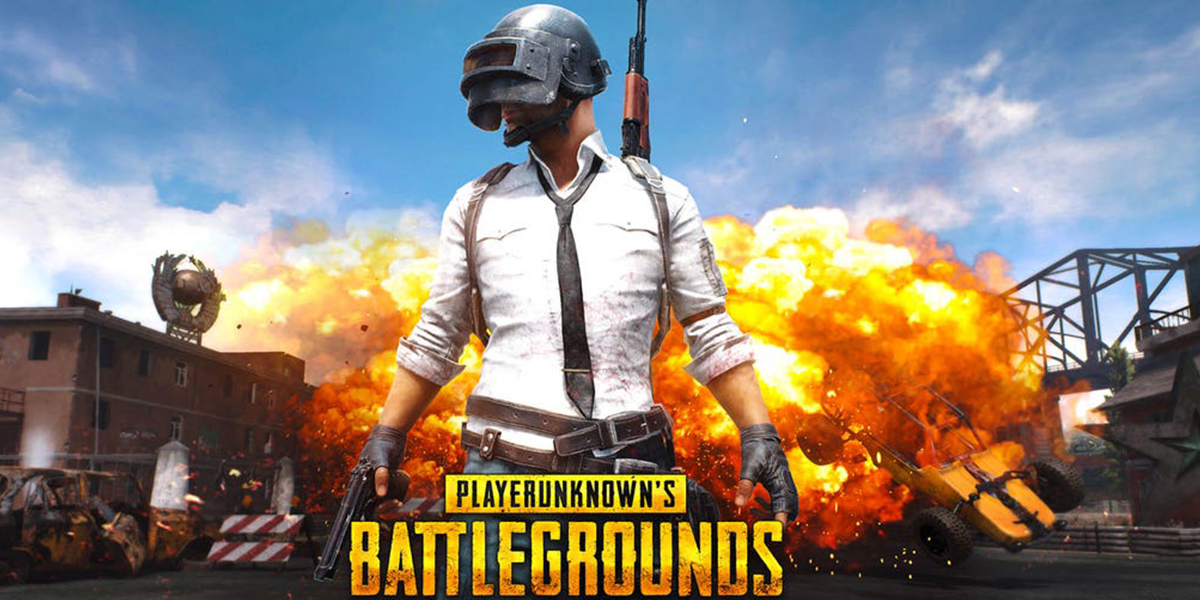

**Problem Statement:**

In a PUBG game, up to 100 players start in each match (**matchId**). Players (**Id**) can be on teams (**groupId**) which get ranked at the end of the game (**winPlacePerc**) based on how many other teams are still alive when they are eliminated. During the game, players can pick up different amunitions, revive downed-but-not-dead (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

The team at [PUBG](https://www.pubg.com/) has made official game data available for the public to explore and scavenge outside of "The Blue Circle." This workshop is not an official or affiliated PUBG site. Its based on the data collected by Kaggle and made available through the [PUBG Developer API](https://developer.pubg.com/).

You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.

To download the dataset used in this project go to this link : https://www.kaggle.com/michaelapers/deprecated-pubg-finish-placement-prediction

**Goal:** 

Perform the PUBG data analysis and answer the following questions:

- Does killing more people increases the chance of winning the game?
  - **Hint:** Use the correlation between the match winning percentage and number of kills to determine the relationship

- How do we catch the fraudsters in the game?
 - **Hint:** Use various logical conditions based on game knowledge to determine fraudsters in the game

- Can we predict the finishing position of a player in the game?
 - **Hint:** Regression Problem: Train and test a model using regression algorithm to predict the final position of the player at the end of the game. Create a model which **predicts players' finishing placement** based on their final stats, on a scale from 1 (first place) to 0 (last place).




![](https://thumbs.gfycat.com/SlimyInsignificantDolphin-max-1mb.gif)


In [1]:
# Importing the required libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Read the dataset using the pandas library

df = pd.read_csv('data.csv')

### Checking the head section of the data to check overthrough of the dataframe
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [3]:
### Checking the Shape of the dataframe

df.shape

(1111742, 30)

In [4]:
### Checking the detailed information about the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

### Before moving to the further steps in our project first we need to have a complete understanding about the Dataset Description

We’ll be using data collected by Kaggle via the [PUBG Developer API](https://developer.pubg.com/). The dataset comprises of 65,000 games worth of anonymised player data, split into training and tests sets. For the purposes of this exploratory analysis we’re only going to be looking at the training data set.

The training set comes in the form of a .CSV file. This file contains 113,290,736 individual data points in 26 columns and 4,357,336 rows.
- **groupId** - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time. 

(**Think:** *Will groupID add any value in our prediction?)*
- **matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.

(**Think:** *Why matchID won't add any value in our prediction?)*
- **assists** - Number of times you helped your friend when he killed an enemy
- **boosts** - Number of boost items used.

**What is it ?** Boost may refer to Energy Drink,Painkillers, Adrenaline Syringe

**About:** The boost bar is a thin white line visible above the health bar. It is cut into 4 sections, which fill up when the player uses a boost item. The first section of the boost bar lasts for 1 minute and will heal 1% health every 8 seconds, for a total of 7% health.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **DBNOs** - Number of enemy players knocked

**What is it?** Stands for 'Down But No Out'. During Duo or squad play, when you lose all your hit points(HP), you get into this mode. In this mode, your duo or squad members can heal you and that is why we don't count this as an out.
'Revive State' is a feature in BATTLEGROUNDS that can be used to revive downed squad mates. Once your HP reaches 0 you will go into a DBNO state. You can only crawl and drop items, but you cannot shoot or use items while in this state.
- **headshotKills** - Number of enemies you killed with headshots.
- **heals** - Number of healing items used.

(**Think:** *Will heals add any value in predicting finish placement?)*

**About:** There are three basic health items in PUBG: Bandages, First Aid Kits and Med Kits. These all restore your health bar. 
- **killPlace** - Your ranking in match in terms of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Ranking where only winning matters).
- **kills** - Number of enemy players killed.
- **killStreaks** - Max number of enemy players killed in a short amount of time. A Killstreak is earned when a player acquires a certain number of kills in a row without dying.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **numGroups** - Number of groups we have data for in the match.
- **revives** - Number of times you revived your teammates.
- **rideDistance** - Total distance traveled in vehicles (measured in meters).
- **roadKills** - Number of enemy killed while travelling in a vehicle.
- **swimDistance** - Total distance traveled by swimming (measured in meters).
- **teamKills** - Number of times you are killed your teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot (measured in meters).
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Ranking where only winning matters).
- **winPlacePerc** - The target of prediction **(Target Variable)**. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [5]:
### Checking the statistical Oveview about the dataset

df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


### Let us check for any outliers and anomalies in our dataset
No dataset is ever 100% clean and this PUBG dataset is no different.

Some of the data does not reflect the core gameplay because it is drawn from custom game modes or because it has fraudsters. Some of the characteristics of this anomalous data include the following:

- Many kills without moving
- Many roadkills while driving a very short distance
- Suspiciously high number of kills
- Suspiciously long range kills

We can have a debate on whether to drop this data or not; however, hackers and custom games exist in the test set, so we decided that it is valuable information when training our models.

**Corrupt Data:** Due to issues with the API, there is a bug with the groupID column. When a player leaves a match and rejoins, their groupID is reassigned, which causes the creation of larger groups than a gamemode would allow. A squad match only allows 4 people per team. In other words there should be at most 4 of the same groupID’s per team.

**Useless Data:** Some features like matchId is only useful for feature extraction such as for finding total players in a match. Because matchId is a hex identifier string, it is not ordinal and has very high unique value count, so we cannot one hot encode it as a categorical. 

![alt text](https://thumbs.gfycat.com/LavishSereneDrever-size_restricted.gif)


### **Before going to Project Building let us divide the work in following steps to make the work easier**

Part 1: Exploratory Data Analysis
 
Part 2: Data Cleaning: Outlier Detection and Removal - Finding the fraudsters

Part 3: Feature Engineering

Part 4: Final Predition

### Part 1: Exploratory Data Analysis 

#### Let us check the unique count of Id Matchid Groupid

In [6]:
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', df[i].nunique())

unique [Id] count: 1111742
unique [groupId] count: 870622
unique [matchId] count: 47951


As we can see there are about 1 Millon unique id who enroll for the game single and around 8 lakhs unique groupid those who enroll the game with creating groupid,coming to unique match id we have around 47k 

### Exploring the Different Match Type in our Game

PUBG offers 3 different game modes:
- Solo - One can play alone (solo,solo-fpp,normal-solo,normal-solo-fpp)
- Duo - Play with a friend (duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp)
- Squad - Play with 4 friends (squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp)

<AxesSubplot:>

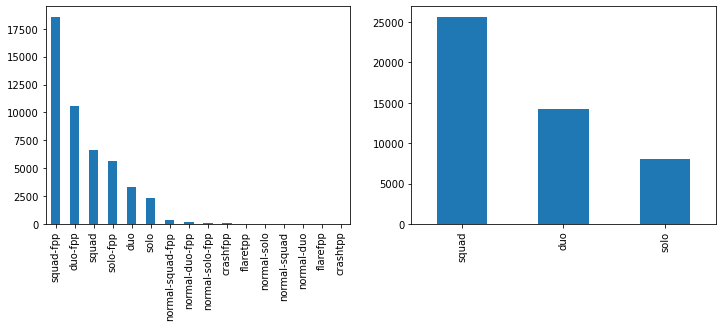

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
df['matchType'] = df['matchType'].apply(mapper)
df.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

The people who play pubg game has a squad has highest kills ratio as we can see on the above graph

### Analyzing the performance of players individually
- players in match and group

During a game, 100 players join the same server,  so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.


In [8]:
def mergeList(list1,list2):
    return list(itertools.product(list1,list2))
match = df.groupby(['matchType','matchId']).size().to_frame('players in match')
group = df.groupby(['matchType','matchId','groupId']).size().to_frame('players in group')
pd.concat([match.groupby('matchType').describe()[mergeList(['players in match'],['min','mean','max'])], 
           group.groupby('matchType').describe()[mergeList(['players in group'],['min','mean','max'])]], axis=1)

players in match                  players in group                
                       min       mean   max              min      mean   max
matchType                                                                   
duo                    1.0  23.282771  39.0              1.0  1.164937  16.0
solo                   1.0  22.266972  42.0              1.0  1.016110  16.0
squad                  1.0  23.420215  42.0              1.0  1.467716  17.0

In [9]:
### Let us check the player performance by Group
group

players in group
matchType matchId        groupId                         
duo       0003b92987589e 024136db14272c                 1
                         0c7fbc2742917b                 2
                         1add3b8ce32302                 1
                         1ed2da8e6c07b5                 1
                         23fcba1c16b936                 1
...                                                   ...
squad     fffe92232706aa abc744463b2dd4                 1
                         b671eab579d429                 1
                         bd5b4ecf8067ab                 1
                         d57f3a3ed40913                 3
                         d8fa9cfd6f9560                 3

[870622 rows x 1 columns]

The above the table shows the number of players in a group as per the match type, matchId and GroupId

In [10]:
### Print the top 5 groups

print(group['players in group'].nlargest(5))

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    17
duo        7e93ce71ac6f61  7385e5fe214021    16
solo       41a634f62f86b7  128b07271aa012    16
squad      d69074849fb3db  6a292d4d1a0207    12
duo        3e029737889ce9  b8275198faa03b    11
Name: players in group, dtype: int64


The above are the Top 5 groups based on Match type i.e.. (squad,duo,solo)

In [11]:
''' ex) matchId=='3e029737889ce9', groupId=='b8275198faa03b'
'''
subset = df[df['matchId']=='3e029737889ce9']
sub_grp = subset[subset['groupId']=='b8275198faa03b']

print('matchId ==\'3e029737889ce9\' & groupId ==\'b8275198faa03b\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('numGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())

matchId =='3e029737889ce9' & groupId =='b8275198faa03b'
--------------------------------------------------
players: 21
groups: 10
numGroups: [14]
maxPlace: [50]
--------------------------------------------------
max-group players: 11
max-group winPlacePerc: [0.2449]
--------------------------------------------------
winPlacePerc: [0.     0.0204 0.0408 0.0612 0.0816 0.1837 0.2245 0.2449 0.5102 1.    ]


The above code shows the average win percentage based on the number of players, groups, numgroups, maxPlace etc., 

#### Checking the most correlated feature with respect to Win Percentage

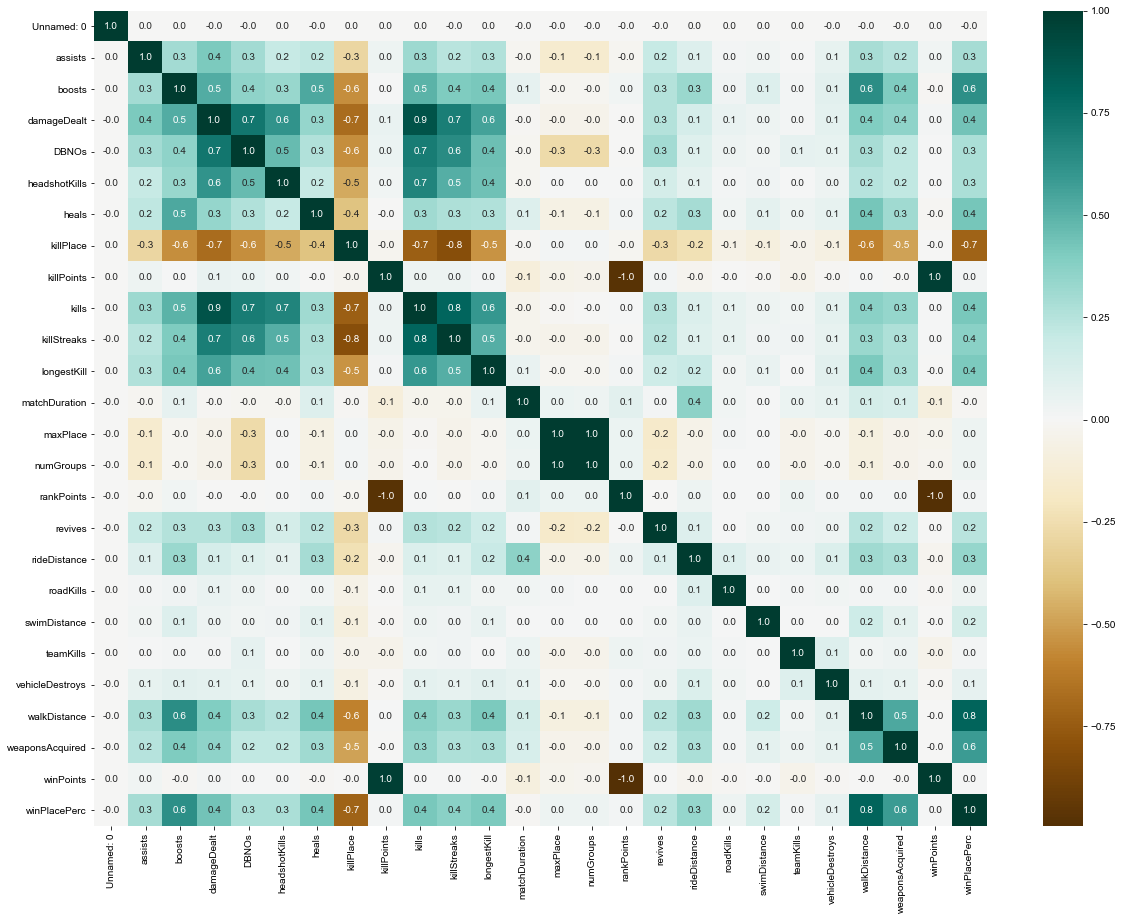

In [12]:
corr = df.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

*We can see from the above correlation feature map that some of the features like boosts, Walk distance, Weapons Acquired, longest kill, killStreaks, etc have highly correlated with the Win percentage*

### Part 2 - Feature Engineering

#### Analysing the kills
![alt text](https://steamuserimages-a.akamaihd.net/ugc/842590018019929617/58725F9B0995477885F13874DF23461A6F47D90F/)

In [13]:
## Checking the average and maximum kills of a player

print("On an average a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(df['kills'].mean(),df['kills'].quantile(0.99), df['kills'].max()))

On an average a person kills 0.9255 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 72.


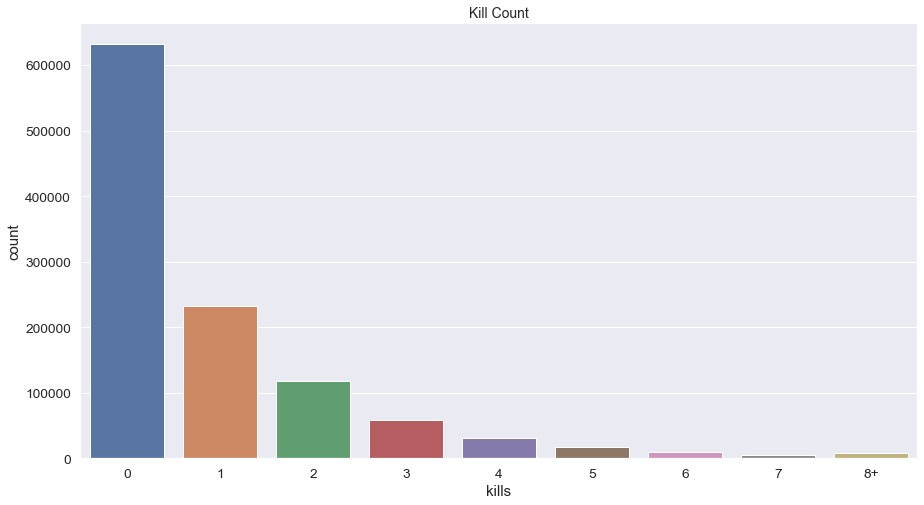

In [14]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=14)
plt.show()

*It seems most of the people cannot even make a single kill. But atleast they deal with some damage*

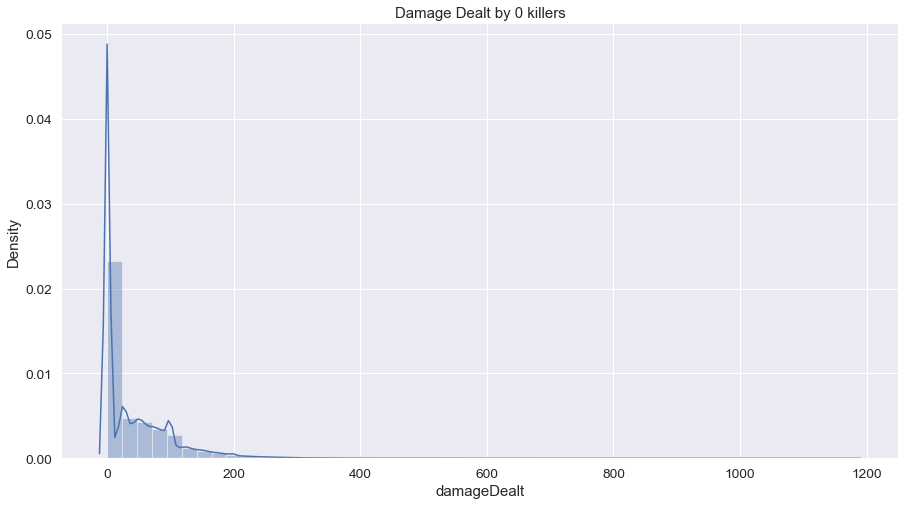

In [15]:
data = df.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

*Well there are few people who win without even making a single kill or dealing with damage.*

In [16]:
print("A total of {} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(df)))
data1 = df[df['damageDealt'] == 0].copy()
print("A total of {} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(df)))

A total of 4197 players (0.3775%) have won without a single kill!
A total of 1199 players (0.1078%) have won without dealing damage!


#### Let us check the effect of kills with Win percentage

As shown below by the increasing mean of win percentage placement, we found that kill count was correlated with our target variable, which makes sense because **more kills usually means a player is better skilled and will rank closer to the top.**

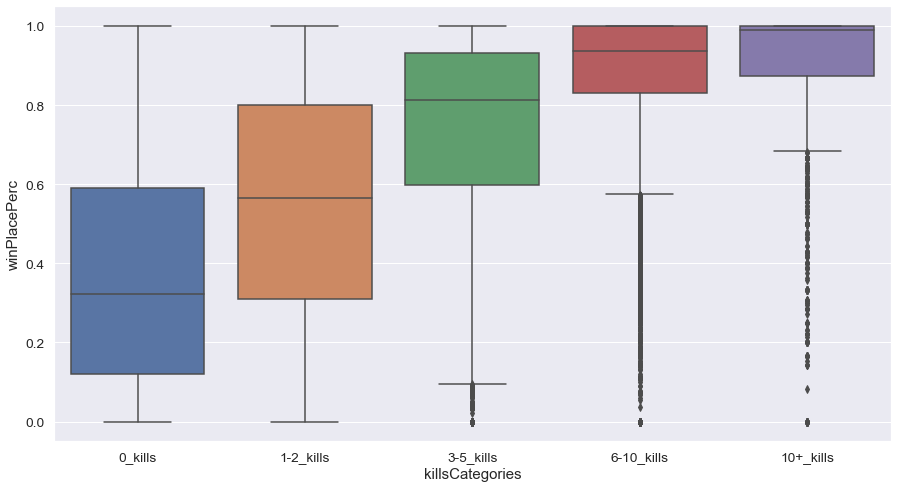

In [17]:
kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

*From the above box plot we can say that the player who got kills in between 6-10 or more then 10 kills has a highest winning percentage*

### Let us analyze the Win percentage with respect to Running feature

![alt text](https://cdn.dribbble.com/users/1373613/screenshots/5419266/______-__.gif)

In [18]:
### checking the walking distance according throughout the game 

print("{} players ({:.4f}%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(df)))

24556 players (2.0422%) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard (more possible).


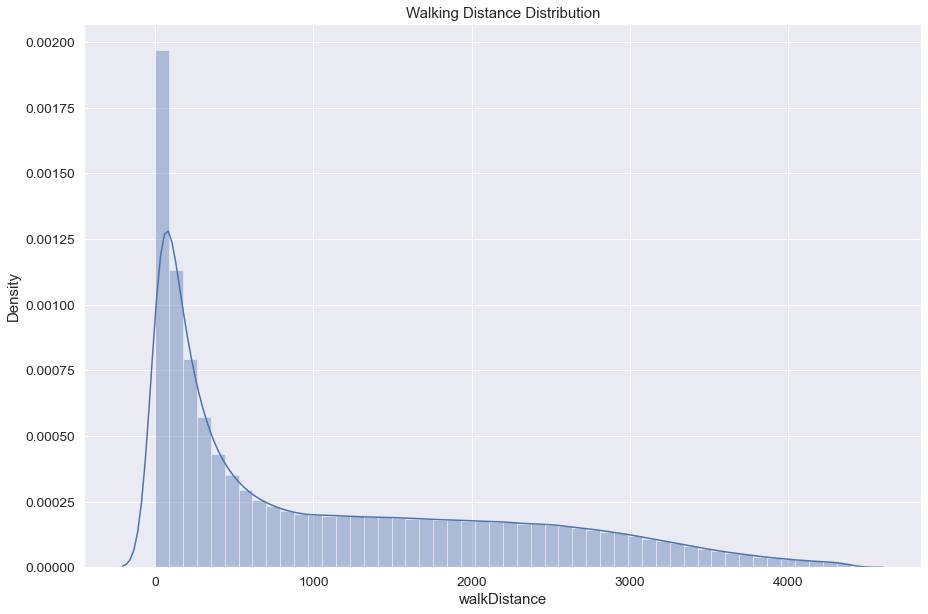

In [19]:
data = df.copy()
data = data[data['walkDistance'] < df['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

### let us analyze the effect of running on Win percentage



**Draw a jointplot to analyze the effect of runnning**

A marginal plot or joint plot allows to study the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. The marginal charts, usually at the top and at the right, show the distribution of the 2 variables using histogram or density plot.

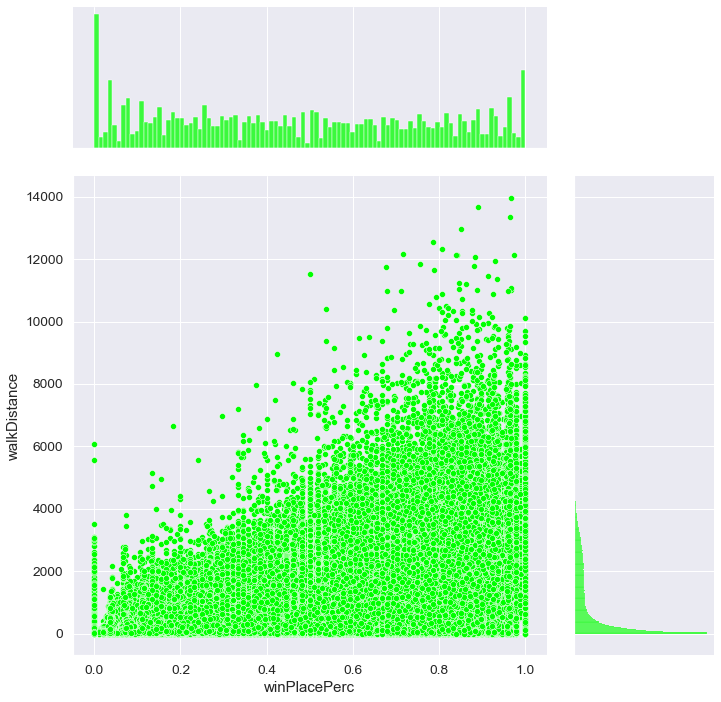

In [20]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, color="lime")
plt.show()

*The scatter plot above indicates there is a high correlation between running and winning percentage. This isn’t something new since the **longer you’re alive, the more you run and more is the chance of winning, which mean players who ran 2000-4000 distance have a high winning percent**.*

### Analyzing the Effect of Riding on Winnning Percentage

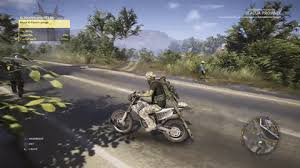

In [21]:
##  Checking the average ride of person in pubg game
print("An average person drives for {:.1f}m, 99% of people have drived {}m or less, while THE RIDER ride for {}m.".format(df['rideDistance'].mean(), df['rideDistance'].quantile(0.99), df['rideDistance'].max()))

An average person drives for 604.2m, 99% of people have drived 6968.0m or less, while THE RIDER ride for 35400.0m.


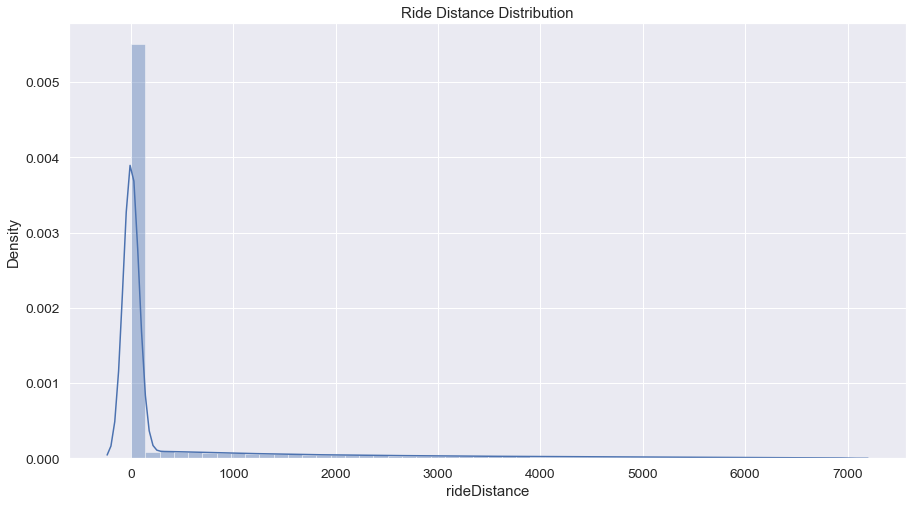

In [22]:
data = df.copy()
data = data[data['rideDistance'] < df['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,8))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [23]:
### Checking how many have didnt ride at all 
print("{} players ({:.4f}%) drived for 0 meters. This means that they like trekking more than riding.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(df)))

827573 players (23.0811%) drived for 0 meters. This means that they like trekking more than riding.


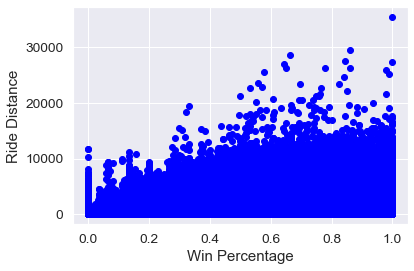

In [24]:
plt.scatter(x='winPlacePerc', y='rideDistance', c ="blue",data=df)
plt.xlabel('Win Percentage')
plt.ylabel('Ride Distance')
plt.show()

*From the above scatter plot it indicates there is a small correlation between driving and winning.*

**As we know in PubG game, if a player is able to destroy the vehicle it indicates the he/she is skilled. Let's check if this theory is correct.**

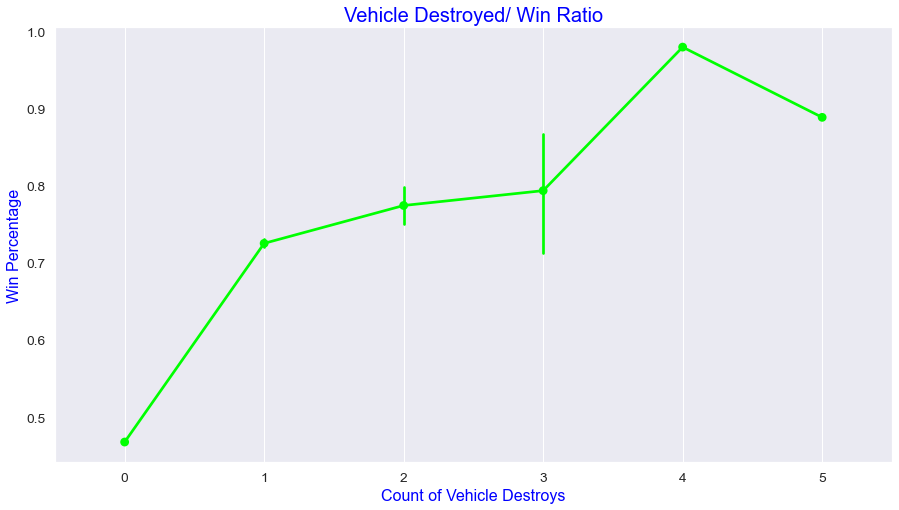

In [25]:
f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='lime',alpha=0.5)
plt.xlabel('Count of Vehicle Destroys',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 16,color='blue')
plt.title('Vehicle Destroyed/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

**From the above point graph we can say with increase in vehicle destorys there is increase in win percentage**

### Analyzing the effect of Healing and Boosting on WinPercent

In [26]:
## Checking the average and max usage of Healing and Boosting 

print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(df['heals'].mean(), df['heals'].quantile(0.99), df['heals'].max()))
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(df['boosts'].mean(), df['boosts'].quantile(0.99), df['boosts'].max()))

In the game on an average a person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 73.
In the game on an average a person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 24.


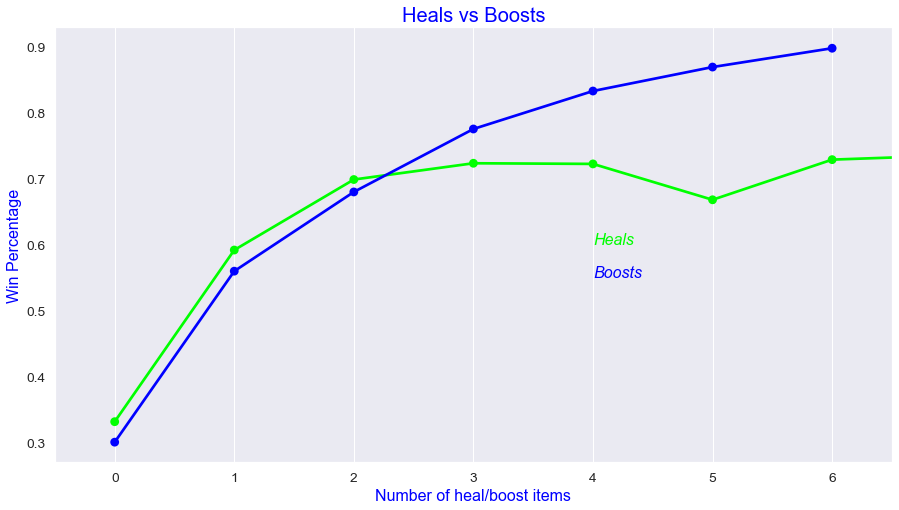

In [27]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 16,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 16,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 16,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

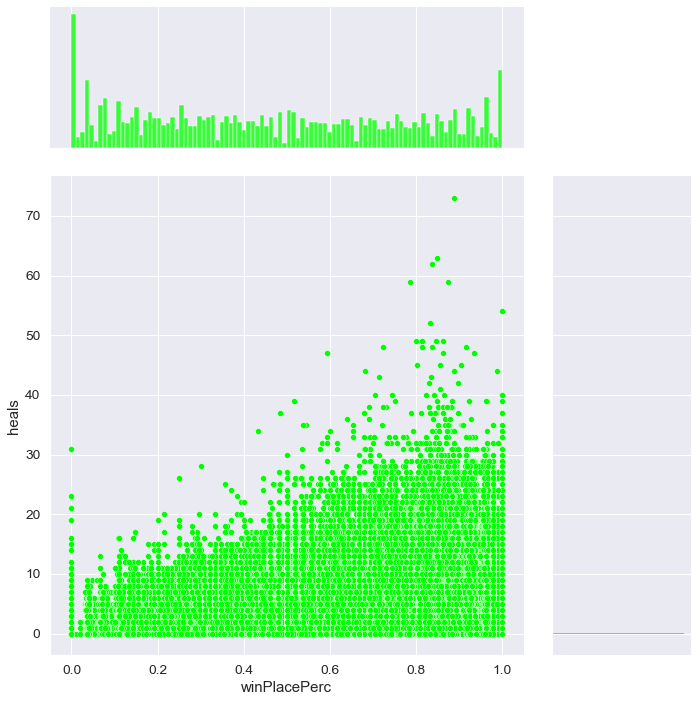

In [28]:
sns.jointplot(x="winPlacePerc", y="heals", data=df, height=10, ratio=3, color="lime")
plt.show()

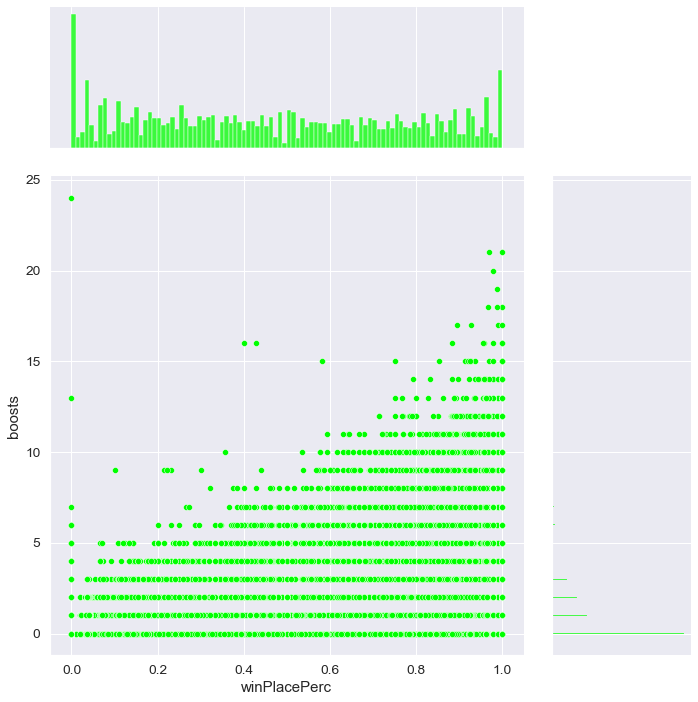

In [29]:
sns.jointplot(x="winPlacePerc", y="boosts", data=df, height=10, ratio=3, color="lime")
plt.show()

*Both healing and boosts have a high correlation with winning, however boosts matter more. Both the plots shows abnormal behaviour at 0 *

### Analyzing the effect of Killing in different Game type: Solo, Duos and Squad on Winning Percentage

In [30]:
solos = df[df['numGroups']>50] #Solo game played by more than 50 different groups
duos = df[(df['numGroups']>25) & (df['numGroups']<=50)] #Duo game can consist of a maximum of 50 groups(50x2=100) 
squads = df[df['numGroups']<=25] # Squad game can consist a maximum of 25 groups(25x4=100)
print("{} ({:.2f}%) of games are solo, {} ({:.2f}%) are duo and {} ({:.2f}%) are squad games.".format(len(solos), 100*len(solos)/len(df), len(duos), 100*len(duos)/len(df), len(squads), 100*len(squads)/len(df)))

177161 (15.94%) of games are solo, 824015 (74.12%) are duo and 110566 (9.95%) are squad games.


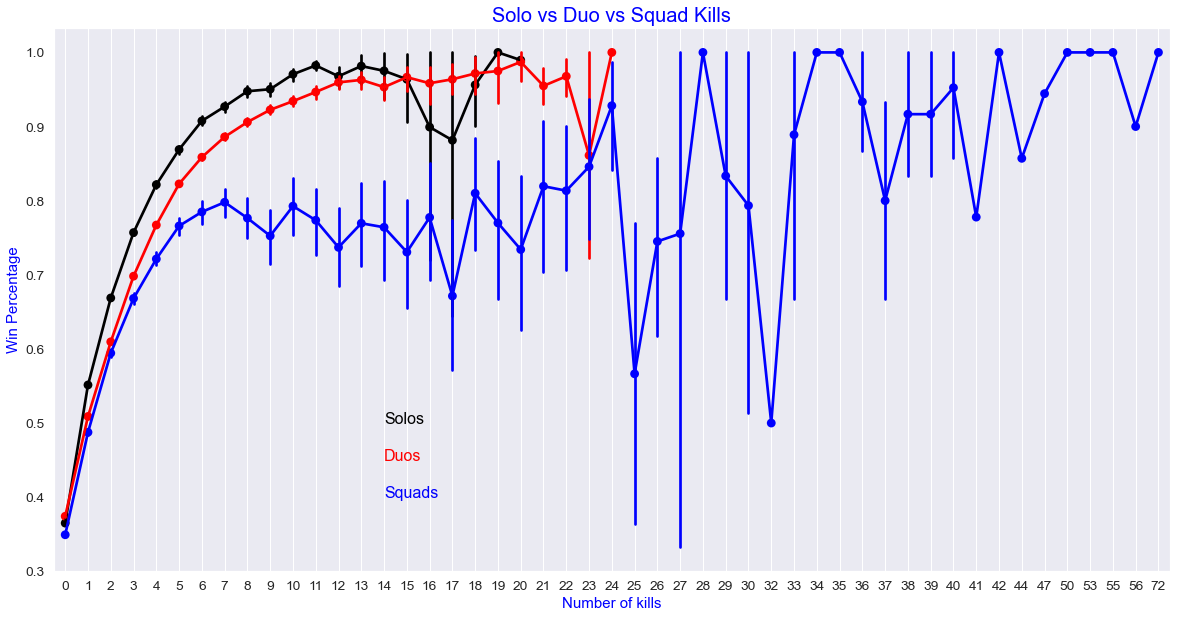

In [31]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.6)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='blue',alpha=0.6)
plt.text(14,0.5,'Solos',color='black',fontsize = 16)
plt.text(14,0.45,'Duos',color='red',fontsize = 16)
plt.text(14,0.4,'Squads',color='blue',fontsize = 16)
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

*From the above graph we can say that Solos and Duos behave the same, but when playing squads kills don't matter that much.*

### Analyzing the effect of Knocking (DBNO), Assisting or Reviving on Winning Percentage

The attribute DBNOs means enemy players knocked. A "knock" can happen only in duos or squads, because the teammates have the chance to "revive" the knocked player in a given time. So a knocked player can be revived or die. If he is revived, the next time he will be knocked, his teammates will have less time to revive him.

The attribute assist can also happen only in duos or squads. It generally means that the player had an involvement in a kill.

The attribute revive also happens in duos or squads

In [32]:
##  Checking the average ride of person in pubg game
print("An average enemy knocked for {:.1f}m, 99% of players knocked {}m or less, while the Knock capacity for {}m.".format(df['DBNOs'].mean(), df['DBNOs'].quantile(0.99), df['DBNOs'].max()))

An average enemy knocked for 0.7m, 99% of players knocked 5.0m or less, while the Knock capacity for 35m.


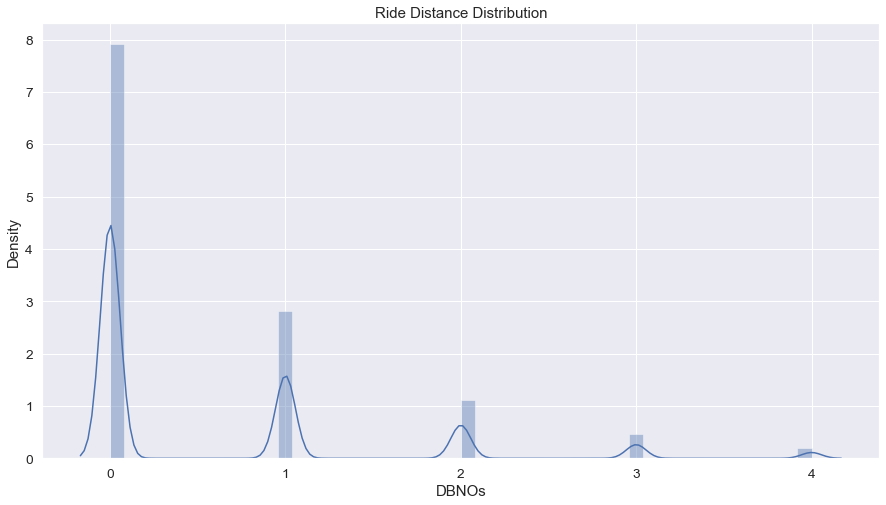

In [33]:
data = df.copy()
data = data[data['DBNOs'] < df['DBNOs'].quantile(0.99)]
plt.figure(figsize=(15,8))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['DBNOs'])
plt.show()

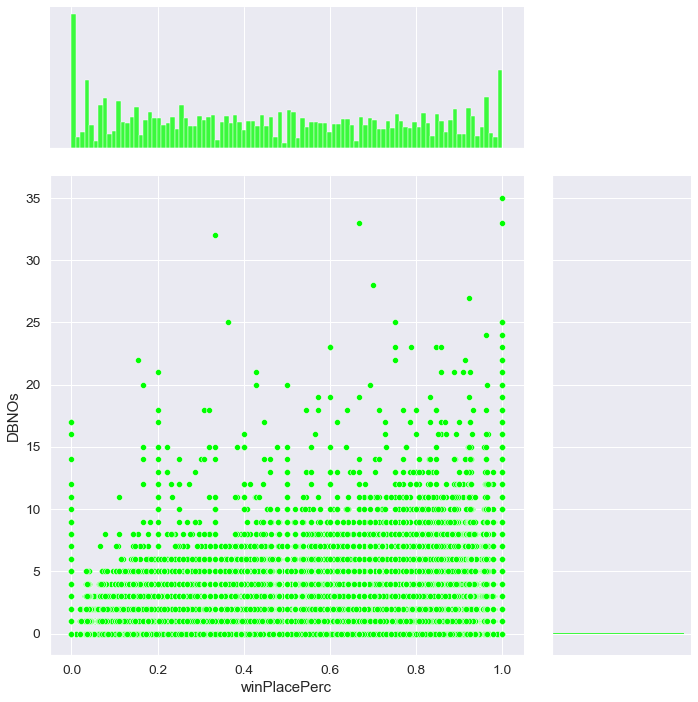

In [34]:
sns.jointplot(x="winPlacePerc", y="DBNOs",  data=df, height=10, ratio=3, color="lime")
plt.show()

*From the above graph we can say that DBNO's is less correlated with WinPercentage*

### Part 2: Data Cleaning: Outlier Detection and Removal - Finding the fraudsters

### Outliers: How do we catch the fraudsters in the game?

### Checking for illegal Match

In [36]:
# Check row with NaN value
df[df['winPlacePerc'].isnull()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [37]:
### Dropping the Null values
df.drop(df[df['winPlacePerc'].isnull()].index, inplace=True)

In [38]:
### checking the shape of dataframe after removing the null values

df.shape

(1111741, 30)

### Anomalies in Killing: Aim Hacks
> **Battleground Aimbots**The use of automated aiming software is without a doubt one of the most powerful cheats that can be used in Playerunknowns Battlegrounds at this time. It allows players to bind a key or mouse button to an auto aim and lock on function that will automatically target any ememy in line of sight. If you are playing duo or in a group, group members will not trigger this function. A trigger bot can then be set to automatically shoot for you or you can chose to shoot yourself.

**Calculating the totalDistance travelled by a player which is the sum total of rideDistance, walkDistance adn swimDistance**

In [39]:
# Engineer a new feature _totalDistance
df['_totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

**Create a new feature 'headshot_rate'. We see that the most players score in the 0 to 10% region. However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!**

In [40]:
# Engineer _headshot_rate feature --- headshots made per kill
df['_headshot_rate'] = df['headshotKills'] / df['kills']
df['_headshot_rate'] = df['_headshot_rate'].fillna(0)

In [41]:
#Defining some functions for plotting graphs, we will be needing a lot of countplot and distplot
def show_countplot(column):
    plt.figure(figsize=(15,8))
    sns.countplot(data=df, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(15, 8))
    sns.distplot(df[column], bins=50)
    plt.show()

### Inhumane kills
Some rows in our dataset have weird characteristics. The players could be fraudsters, maniacs or just anomalies. Removing these outliers will likely improve results.

Let's take a look at the players who make these shots.

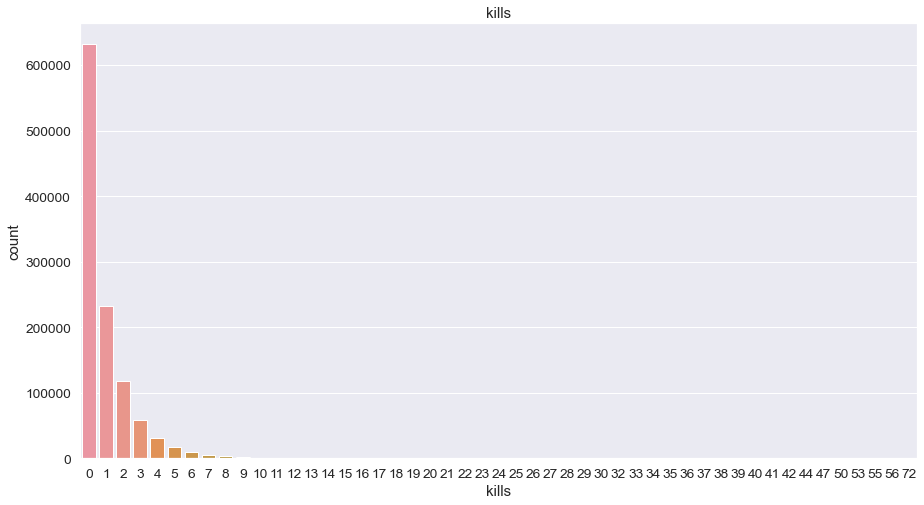

In [42]:
show_countplot('kills')

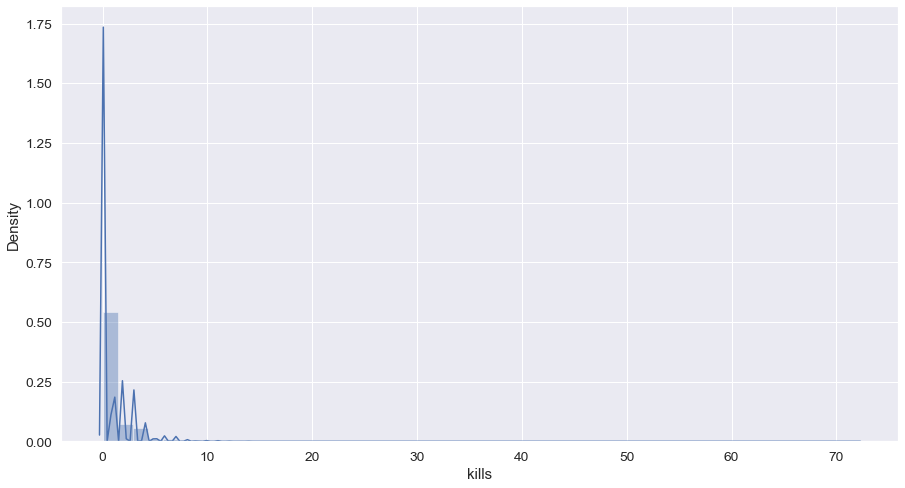

In [43]:
show_distplot('kills')

In [44]:
# Is it even possible to kill more than 40 people by acquiring more than 55 weapons and maintaining a total distance of less than 100m?

df[(df['kills'] >= 40) & (df['weaponsAcquired'] > 55) & (df['_totalDistance'] < 100.0)]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
1036315,770454,2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,...,0,0.0,0,0,85.55,66,0,1.0000,85.55,0.127273
1062585,1378200,f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,...,0,0.0,0,0,46.71,72,0,0.7778,46.71,0.121951


In [45]:
# Is it even possible to kill more than 40 people without using any heals?

df[(df['kills'] >= 40) & (df['heals'] == 0)]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
373851,3924729,579949f753978c,108f4c00d80882,ff9cd80c0d8fb7,1,2,3680.0,0,35,0,...,0,0.0,0,0,1180.0,2,1500,1.0,1180.0,0.875


In [46]:
# Drop 'fraudsters' with inhumane kill counts

df.drop(df[(df['kills'] >= 40) & (df['weaponsAcquired'] > 55) & (df['_totalDistance'] < 100.0)].index, inplace=True)
df.drop(df[(df['kills'] >= 40) & (df['heals'] == 0)].index, inplace=True)

### 100% Headshot Kills

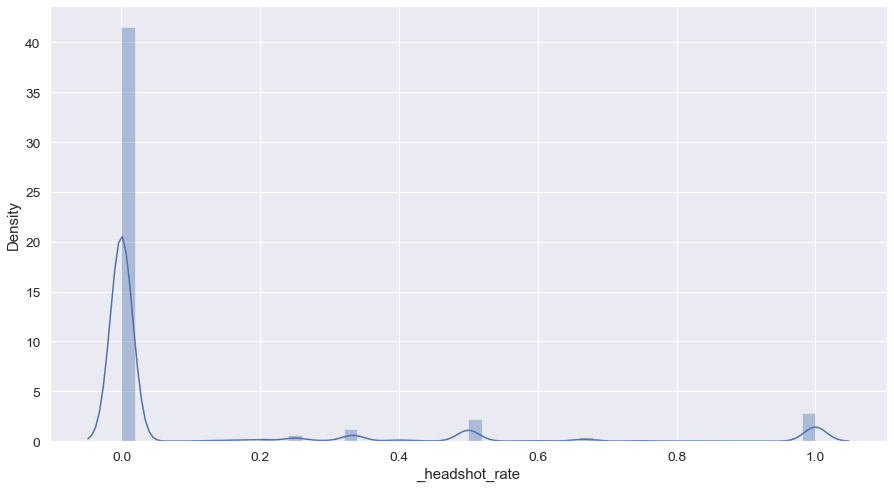

In [47]:
# Plot the distribution of headshot_rate

show_distplot('_headshot_rate')

In [48]:
# List of Hitman who made more than 10 kills and all the kills were done by headshot(perfect kill)

display(df[(df['_headshot_rate'] == 1) & (df['kills'] >=10)].shape)
df[(df['_headshot_rate'] == 1) & (df['kills'] >= 10)].head(10)

(4, 32)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
445360,2256755,d8474df8d8283a,50c8a5b906d89d,c6da477a07f4aa,0,7,1569.0,0,14,0,...,0,0.0,0,0,2209.0,3,0,1.0,4994.0,1.0
577809,1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,...,0,0.0,0,0,2450.0,7,1468,1.0,2858.9,1.0
596325,346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,...,0,0.0,0,0,3422.0,8,1560,1.0,8142.0,1.0
856491,963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,...,0,0.0,0,0,2458.0,4,1562,1.0,3476.0,1.0


*It is unclear if these players are cheating or are the legends so for now we are not deleting these players from the dataset.*

### Killing without Moving
Identify the fraudsters who can making kills without even moving. So for this we first identify the totalDistance travelled by a player and then set a boolean value to True if someone got kills without even moving a single inch.

In [49]:
# Create feature killsWithoutMoving

df['_killsWithoutMoving'] = ((df['kills'] > 0) & (df['_totalDistance'] == 0))

# Check players who kills without moving
display(df[df['_killsWithoutMoving'] == True].shape)
df[df['_killsWithoutMoving'] == True].head(10)

(375, 33)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
1267,1535402,c80731765f5704,68345b2f762dc8,d38a14fb160874,5,0,1075.0,0,1,1,...,0.0,0,0,0.0,19,1500,0.1429,0.0,0.111111,True
2977,4061792,32cc8af554977f,a44a18784c7ad0,732c3b752e055f,1,0,190.3,0,0,0,...,0.0,0,0,0.0,1,0,0.0217,0.0,0.000000,True
5585,1573958,1ed752158c7bbc,338d6ab3bf5f19,4c6b1a0e4cb346,1,0,369.6,0,1,2,...,0.0,2,0,0.0,27,0,1.0000,0.0,0.250000,True
9700,1845495,d4b5b144dbb5df,1e27daf256b9ad,59cd3bc39072e8,4,0,656.1,4,0,7,...,0.0,0,0,0.0,22,1500,0.2500,0.0,0.000000,True
10092,3803166,861fd334addd94,15ba030fd830cc,ed41b4340cd7af,1,0,524.4,0,0,2,...,0.0,0,0,0.0,14,1500,1.0000,0.0,0.000000,True
14025,1084495,a4d301a7407a07,25d19b1bf31ea3,cd535385c94139,0,2,297.3,5,2,8,...,0.0,0,0,0.0,13,1500,0.0000,0.0,0.500000,True
14964,1997443,e88981e06fc0e7,d1cbdec91221d1,1aca7a1fad63bf,2,0,1902.0,0,0,1,...,0.0,0,0,0.0,29,1500,0.6000,0.0,0.000000,True
16337,2262239,778e65309ef561,69c8c987979fb0,31179d2d545bba,2,0,520.4,5,1,0,...,0.0,0,0,0.0,13,0,1.0000,0.0,0.250000,True
17352,3760919,11463dca072357,055188f5012302,7dbdfc03179137,1,2,570.4,0,3,1,...,0.0,0,0,0.0,12,0,0.5000,0.0,0.600000,True
19418,3757251,96805fcf390f3e,dbe66c2c54cc90,3ebf1bf8bc6bae,4,4,1182.0,0,6,8,...,0.0,0,0,0.0,16,1500,0.9310,0.0,0.500000,True


In [50]:
# Drop kill without moving 'fraudsters'

df.drop(df[df['_killsWithoutMoving'] == True].index, inplace=True)

### Longest Kill
Most kills are made from a distance of 100 meters or closer. However there are some players (outliers) who make a kill from more than 1km away. These players are probably fraudsters.

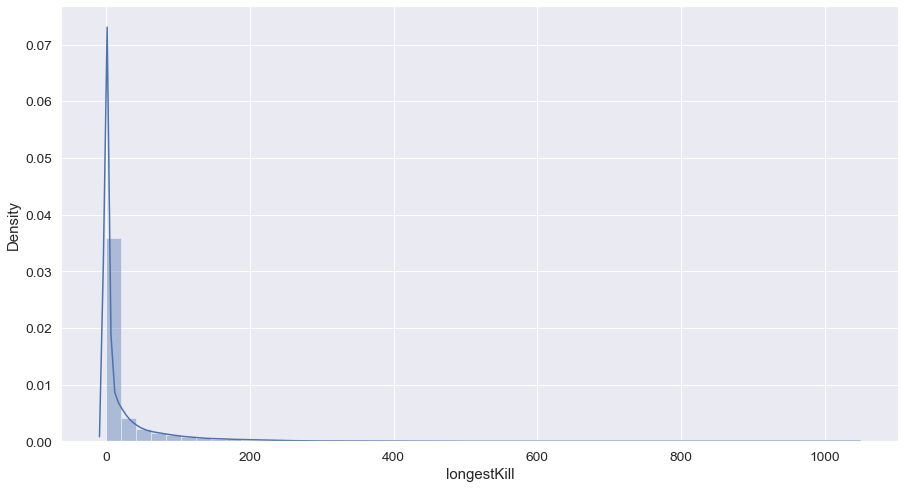

In [51]:
show_distplot('longestKill')

Is it even posssible to snipe (kill) someone from a distance > 1Km in this game?

Let's take a look at the players who took these shots.

In [52]:
df[df['longestKill'] >= 1000]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
101252,1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,...,0.00,0,0,2848.0,4,1500,0.9412,2848.00,0.466667,False
567594,4332473,d8857d3d7e31b6,085de7a36897e6,42f997c16d8a0e,5,0,1685.0,11,3,18,...,0.00,0,0,523.3,35,1500,0.9091,523.30,0.187500,False
644598,324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,...,0.00,0,0,1264.0,26,0,1.0000,2981.00,0.000000,False
878056,2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,...,0.00,0,0,133.2,43,0,0.6000,133.20,0.545455,False
900761,2981715,7f77051c7cef52,d6579a630399b5,4784f7d9a06b51,3,5,1025.0,5,2,5,...,87.96,0,0,3998.0,7,0,1.0000,4085.96,0.333333,False
1055182,1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,...,0.00,0,0,832.5,9,1500,0.2857,832.50,0.000000,False


In [53]:
# Drop longestKill 'fraudsters'

df.drop(df[df['longestKill'] >= 1000].index, inplace=True)

### Road Kills

In [54]:
# Players who got more than 10 roadKills

df[df['roadKills'] > 10]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
139693,2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,...,5.297,0,0,1277.0,0,1371,0.4286,1282.302,0.0,False


*Did you noticed how c3e444f7d1289f ride just 5 meters but has killed 14 players in the roadkill. Got LUCKY or just another anomaly?*

In [55]:
# Drop roadKill 'fraudsters'

df.drop(df[df['roadKills'] > 10].index, inplace=True)

### Finding anomaly in travelling
PUBG map is 8*8 km and each yellow square represents 1km.
![alt text](https://gamepedia.cursecdn.com/battlegrounds_gamepedia_en/thumb/e/ea/Map.jpg/800px-Map.jpg?version=928379c81f738c9cd92cef477c46f8c3)

In [56]:
df[['walkDistance', 'rideDistance', 'swimDistance']].describe()

,walkDistance,rideDistance,swimDistance
count,1.111356e+06,1.111356e+06,1.111356e+06
mean,1.153672e+03,6.044225e+02,4.546563e+00
std,1.182797e+03,1.496167e+03,3.062367e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.555000e+02,0.000000e+00,0.000000e+00
50%,6.848000e+02,0.000000e+00,0.000000e+00
75%,1.975000e+03,1.027500e-01,0.000000e+00
max,1.396000e+04,3.540000e+04,2.668000e+03


### Detecting Anomalies in Walking

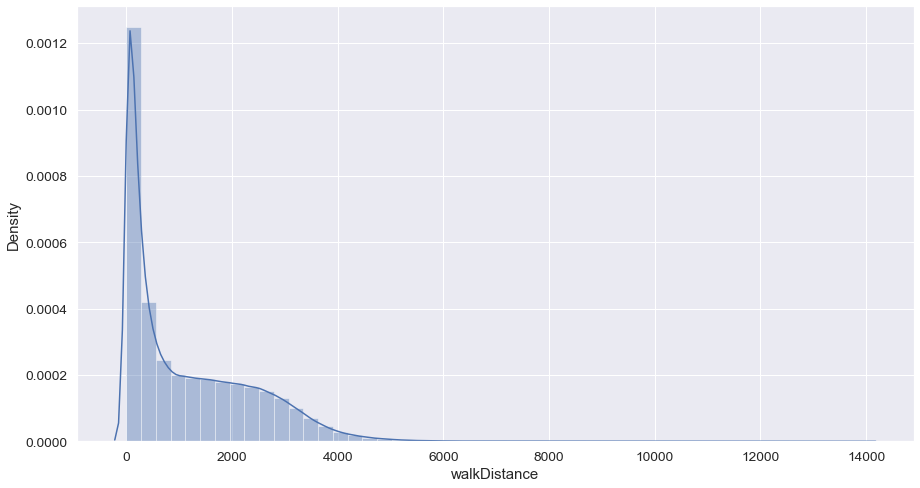

In [57]:
show_distplot('walkDistance')

In [58]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places without killing 
# anyone and how can they travel 13kms in the game?

df[(df['walkDistance'] >= 13000) & (df['kills'] == 0)]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
428932,1188935,2dd8f83eb3bd7f,d1e7809ff69bb4,c8585bc8a88aa6,0,0,0.0,0,0,0,...,180.70,0,0,13360.0,4,0,0.9643,14798.7000,0.0,False
806454,3318429,25a548c95fa48f,978df298b094ba,99407bcde7569c,0,0,0.0,0,0,2,...,38.44,0,0,13660.0,1,0,0.8913,13698.4539,0.0,False


In [59]:
# Drop walking anomalies
df.drop(df[(df['walkDistance'] >= 13000) & (df['kills'] == 0)].index, inplace=True)

### Detecting Anomalies in Riding

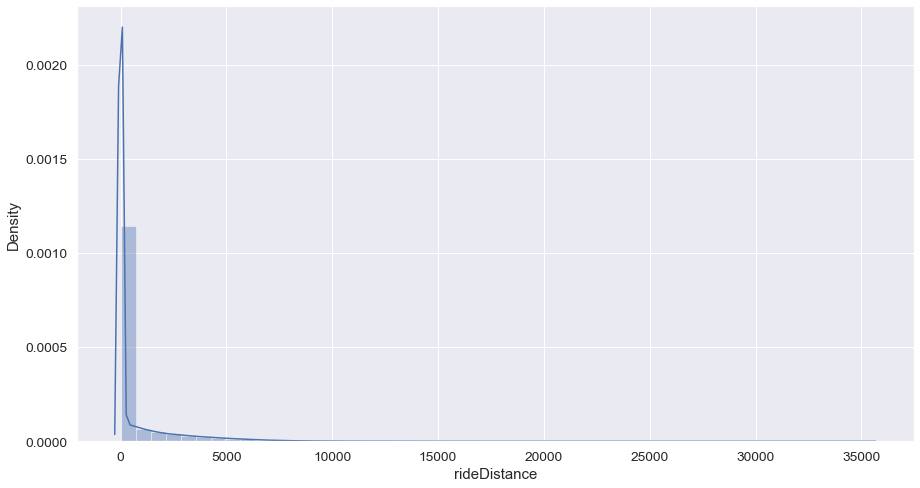

In [60]:
show_distplot('rideDistance')

In [61]:
#Travel Lust and Wandrer ---> They just play to roam around and explore places
# without killing anyone - How can you ride for 30km?

df[(df['rideDistance'] >= 30000) & (df['kills'] == 0)]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving


In [62]:
# How is it even possible that a player is able to ride and kill 
# without walking even a single meter ?

df[(df['walkDistance'] == 0) & (df['rideDistance'] > 0) & (df['kills'] > 0)]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
27138,2907639,2bf1d34142358b,71c15011651348,08dfa30b9390f7,4,0,578.0,0,0,6,...,0.0,0,0,0.0,29,0,0.4000,1277.0,0.0,False
591581,1051447,c43116d1c3d4e5,bd09c97b67800a,aad60eee7eeb79,0,0,102.2,0,0,0,...,0.0,0,0,0.0,0,1532,0.1250,1757.0,0.0,False
621870,219621,49e86bcbb74918,5bf4ac7f5f89a0,05a97d10e3cf81,0,0,100.0,1,0,0,...,0.0,0,0,0.0,0,0,0.0000,673.1,0.0,False
756539,3778837,ca3ca72549b07f,68a0c84f3b09aa,f72f06cafb3349,0,0,144.3,2,0,0,...,0.0,0,0,0.0,0,1496,0.0000,415.4,0.0,False
1018982,1166930,553f199b5538c5,560c2ba9dcbbd0,afb05e37d884fc,2,0,168.5,1,0,0,...,0.0,0,0,0.0,0,1499,0.0667,391.8,0.0,False


In [63]:
# What was the player doing in the game when total distance travelled by him/her is 0? 

df[(df['_totalDistance'] == 0)]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
14,414480,f842ff43c8f9ad,864a3a2466261f,4d7116c9b9a2b2,0,0,0.0,0,0,0,...,0.0,0,0,0.0,1,0,0.0000,0.0,0.0,False
109,2396687,ca4cb1db7945a9,54fc7ce6e8a0ea,0a0d838991c73c,0,0,0.0,0,0,0,...,0.0,0,0,0.0,0,1537,0.0000,0.0,0.0,False
117,245814,95c0096f44f2fe,6a04b6e41582c2,65950aececdd8c,0,0,0.0,0,0,0,...,0.0,0,0,0.0,0,1387,0.0000,0.0,0.0,False
122,1436489,16df4467dd1909,c0d7b134c6fee7,6a88fd55179e1f,0,0,0.0,0,0,0,...,0.0,0,0,0.0,0,0,0.0000,0.0,0.0,False
145,784571,d7856623e49d29,9d21250f86d95a,18f4bbda0383e7,0,0,0.0,0,0,0,...,0.0,0,0,0.0,1,0,0.0319,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111585,3326087,6a080317d5b5d0,a68e9b279d81ce,55805a14036bd1,0,0,0.0,0,0,0,...,0.0,0,0,0.0,0,1376,0.0000,0.0,0.0,False
1111600,357438,eb95182099b37b,e87d1963d5ba84,0ca10f5e77daf2,0,0,197.5,0,0,1,...,0.0,0,0,0.0,3,0,0.0000,0.0,0.0,False
1111607,1998211,a3dd9f410b7852,6c515e27d400f7,a051fae53c35bf,0,0,0.0,0,0,0,...,0.0,0,0,0.0,0,620,0.0000,0.0,0.0,False
1111644,3940241,3e67302a58e2e7,dfea0a9eaee18c,5df144c4cbebbf,0,0,0.0,0,0,0,...,0.0,0,0,0.0,1,0,0.0000,0.0,0.0,False


In [64]:
# Drop riding anomalies
df.drop(df[(df['rideDistance'] >= 30000) & (df['kills'] == 0)].index, inplace = True)
df.drop(df[(df['walkDistance'] == 0) & (df['rideDistance'] > 0) & (df['kills'] > 0)].index, inplace = True)
df.drop(df[(df['_totalDistance'] == 0)].index, inplace=True)

![alt text](https://media.giphy.com/media/qlCFjkSruesco/giphy.gif)

### Swim Distance


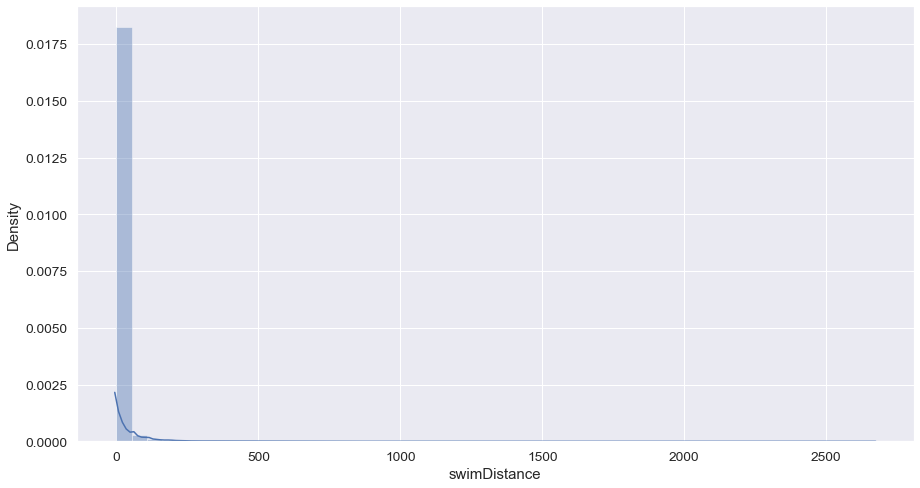

In [65]:
show_distplot('swimDistance')

In [66]:
# How can you swim for more than 2 km without breathing?
df[df['swimDistance'] >= 2000]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
302399,2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.8,5,5,2,...,2206.0,0,0,4687.0,4,0,0.96,9926.0,0.714286,False
306071,1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.3,3,1,6,...,2668.0,0,0,415.1,10,1499,1.00,3083.1,0.200000,False


In [67]:
# Remove outliers
df.drop(df[df['swimDistance'] >= 2000].index, inplace=True)

![](https://i.imgur.com/hxbfBFI.gif)

### Anomalies detection in Supplies (WeaponAcquired)
Most people acquire between 0 and 10 weapons in a game, but you also see some people acquire more than 80 weapons! Let's check these guys out.

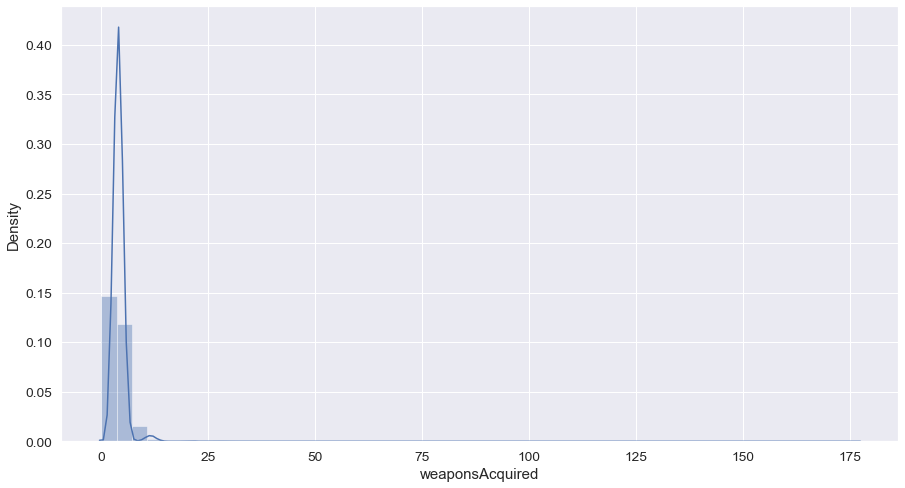

In [68]:
show_distplot('weaponsAcquired')

In [69]:
display(df[df['weaponsAcquired'] >= 80].shape)
df[df['weaponsAcquired'] >= 80].head()

(7, 33)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
203101,233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,...,0.0,0,0,1307.0,128,1577,0.7111,3187.0,0.0000,False
225057,2977084,fedf03626cf9f2,11d036be4e05e5,ab1308cd283e8a,1,4,683.60,5,0,8,...,0.0,0,0,3084.0,85,1550,1.0000,3534.6,0.0000,False
282253,3405716,bf0f64b40f6975,bbf007abbbe303,f900de1ec39fa5,8,0,2614.00,0,9,4,...,0.0,1,0,381.3,88,0,0.3000,381.3,0.3000,False
381147,3951710,a55a2d4f4e4852,d9bdbeaeab7143,2518cb67372cb4,0,0,96.76,0,0,0,...,0.0,0,0,2798.0,81,1447,0.8710,6607.0,0.0000,False
668081,2373240,a8c150d5d3d3e2,6e1c8c5f91e060,f900de1ec39fa5,12,0,1746.00,0,1,1,...,0.0,0,0,275.9,96,0,0.0000,275.9,0.0625,False


*player 7c8c83f5f97d0f acquired 128 weapons in one game!*

In [70]:
# Remove outliers

df.drop(df[df['weaponsAcquired'] >= 80].index, inplace=True)

### Anomalies in Heals

Most players us 5 healing items or less. We can again recognize some weird anomalies

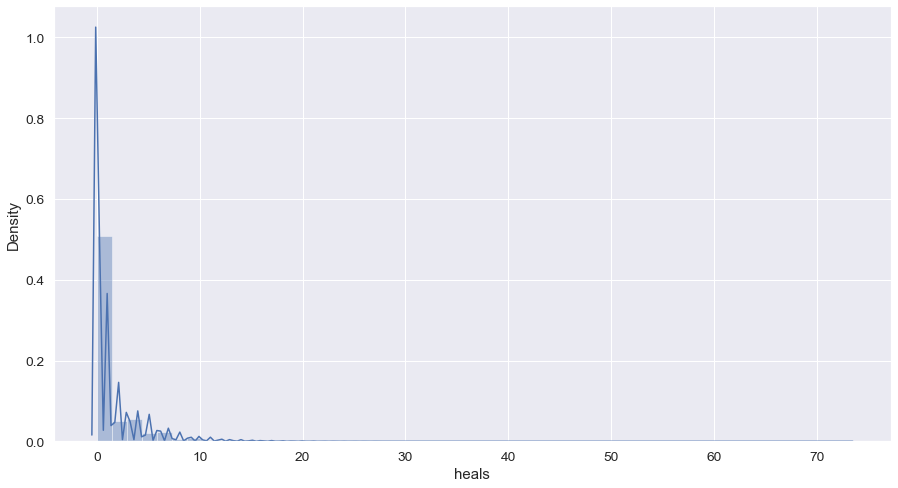

In [71]:
show_distplot('heals')

In [72]:
# 40 or more healing items used
display(df[df['heals'] >= 40].shape)
df[df['heals'] >= 40].head(10)

(37, 33)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
14194,3526463,bdea2f1e8926dd,6186c5c6e90896,0a845f8043f624,0,2,93.4,0,0,42,...,0.000,1,1,2187.0,4,0,0.8298,7521.000,0.00,False
90244,3487948,c12ef95da5057d,22f6dace704601,3c7746d8ebeb33,0,4,281.1,1,0,48,...,0.000,0,0,2419.0,5,1513,0.9167,3026.600,0.00,False
136380,3005215,b0a0a49602c440,e7885a69a72615,5a32d7e4d932c8,0,5,300.0,2,2,49,...,0.000,0,0,2179.0,7,0,0.8462,6307.000,0.50,False
185359,1948680,27fee68a86b73c,aa1f235352ba20,1a2af48f98525c,0,6,0.0,0,0,45,...,4.381,0,0,2293.0,5,0,0.8557,3482.381,0.00,False
188802,3281072,4bd8543175b95a,866513cf0ae9da,c4593a93da19fe,1,6,90.0,0,0,49,...,0.000,0,0,1797.0,6,1507,0.8148,2092.900,0.00,False
193592,268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,...,0.000,0,0,1968.0,9,0,0.8370,5816.000,0.00,False
293947,3886961,7a7ab9334bf5fe,64b4e6d5a4489a,c7977f9b41b3fa,2,4,419.9,5,1,40,...,0.000,0,0,2950.0,11,0,0.7037,6042.000,0.25,False
298523,3216926,6615ccb68f81df,f1eb0904d4772d,e7601c2e480c64,0,6,0.0,0,0,43,...,0.000,0,0,1041.0,4,0,0.8352,6151.000,0.00,False
306286,2230047,e0b28a11333681,d983e484636469,a7a4aaf50139ad,0,3,0.0,0,0,40,...,0.000,0,0,2877.0,4,0,0.8421,6588.000,0.00,False
320767,2695113,d02a6ee9c53af2,eee6d9c5f8a3d8,2d73312b1d372f,0,6,175.8,0,0,40,...,0.000,0,0,1742.0,5,1790,1.0000,5176.000,0.00,False


In [73]:
# Remove outliers
df.drop(df[df['heals'] >= 40].index, inplace=True)

### Should we remove all these outliers from our dataset or not?
In DataScience their is no predefined strategy . Where you can say for sure this is the right way to do it. All of us have different way, different methods and differnet openion.

According to me in this particular case we have a millions of rows , So we can afford to loose few thousand . If it helps to create a better model.

In [74]:
df.shape

(1087286, 33)

In [75]:
df.to_csv('cleaned_data.csv', index=False)

In [76]:
# import pandas as pd

cleaned_data = pd.read_csv('cleaned_data.csv')

**Part 3: Feature Engineering**

### Let us Add/Remove some new Features and finding their correlation with the winPlacePer

A game in PUBG can have up to 100 players fighting each other. But most of the times a game isn't "full". There is no variable that gives us the number of players joined. So lets create one.

In [77]:
cleaned_data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate,_killsWithoutMoving
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0.0,0,0,151.30,1,1525,0.0667,151.30,0.0,False
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0.0,0,0,1918.00,7,1516,0.5862,1918.00,0.0,False
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0.0,0,0,820.00,7,0,0.8105,4908.00,0.0,False
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,0.0,0,0,38.81,0,1515,0.5556,38.81,0.0,False
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0.0,0,0,1721.00,5,0,0.6429,2639.40,0.0,False


In [78]:
cleaned_data['_playersJoined'] = cleaned_data.groupby('matchId')['matchId'].transform('count')
data = cleaned_data.copy()
data = data[data['_playersJoined']>49]
#plt.figure(figsize=(15,10))
#sns.countplot(data['_playersJoined'])
#plt.title("Players Joined",fontsize=15)
#plt.show()

### Normalizing the features
Now that we have a feature '_playersJoined' we can normalize other features based on the amount of players. Features that can be valuable to normalize are:

kills
damageDealt
maxPlace
matchDuration

In [79]:
# Create normalized features

cleaned_data['_killsNorm'] = cleaned_data['kills']*((100-cleaned_data['_playersJoined'])/100 + 1)
cleaned_data['_damageDealtNorm'] = cleaned_data['damageDealt']*((100-cleaned_data['_playersJoined'])/100 + 1)
cleaned_data['_maxPlaceNorm'] = cleaned_data['maxPlace']*((100-cleaned_data['_playersJoined'])/100 + 1)
cleaned_data['_matchDurationNorm'] = cleaned_data['matchDuration']*((100-cleaned_data['_playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','_killsNorm','damageDealt', '_damageDealtNorm', 'maxPlace', '_maxPlaceNorm', 'matchDuration', '_matchDurationNorm']
cleaned_data[to_show][0:11]

,Id,kills,_killsNorm,damageDealt,_damageDealtNorm,maxPlace,_maxPlaceNorm,matchDuration,_matchDurationNorm
0,a3e3cea9f2e314,0,0.00,25.93,44.5996,31,53.32,1403,2413.16
1,43e4be7ad72cc7,0,0.00,36.71,62.4070,30,51.00,1971,3350.70
2,9a68690e31fdff,0,0.00,47.73,83.0502,96,167.04,1741,3029.34
3,b147e1bd448fc4,0,0.00,0.00,0.0000,28,49.28,1738,3058.88
4,d818b4edd59612,1,1.73,100.00,173.0000,99,171.27,2193,3793.89
5,e705cb7a4446ea,0,0.00,0.00,0.0000,94,167.32,1358,2417.24
6,e253262031e08f,0,0.00,0.00,0.0000,99,178.20,1497,2694.60
7,c264a5ce0d4ca1,1,1.73,170.20,294.4460,97,167.81,1968,3404.64
8,342437cd2b5680,4,7.00,338.70,592.7250,47,82.25,1989,3480.75
9,3cf3cc81325a37,3,5.31,230.80,408.5160,32,56.64,1373,2430.21


In [80]:
match = cleaned_data.groupby('matchId')
cleaned_data['_killsPerc'] = match['kills'].rank(pct=True).values
cleaned_data['_killPlacePerc'] = match['killPlace'].rank(pct=True).values
cleaned_data['_walkDistancePerc'] = match['walkDistance'].rank(pct=True).values
cleaned_data['_damageDealtPerc'] = match['damageDealt'].rank(pct=True).values
cleaned_data['_walkPerc_killsPerc'] = cleaned_data['_walkDistancePerc'] / cleaned_data['_killsPerc']
cleaned_data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,_playersJoined,_killsNorm,_damageDealtNorm,_maxPlaceNorm,_matchDurationNorm,_killsPerc,_killPlacePerc,_walkDistancePerc,_damageDealtPerc,_walkPerc_killsPerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,28,0.00,44.5996,53.32,2413.16,0.285714,0.857143,0.357143,0.214286,1.250000
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,30,0.00,62.4070,51.00,3350.70,0.283333,0.566667,0.566667,0.166667,2.000000
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,26,0.00,83.0502,167.04,3029.34,0.230769,0.615385,0.538462,0.384615,2.333333
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,24,0.00,0.0000,49.28,3058.88,0.312500,0.625000,0.083333,0.125000,0.266667
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,27,1.73,173.0000,171.27,3793.89,0.555556,0.518519,0.629630,0.388889,1.133333


In [81]:
corr = cleaned_data[['_killsPerc', '_killPlacePerc','_walkDistancePerc','_damageDealtPerc', '_walkPerc_killsPerc','winPlacePerc']].corr()

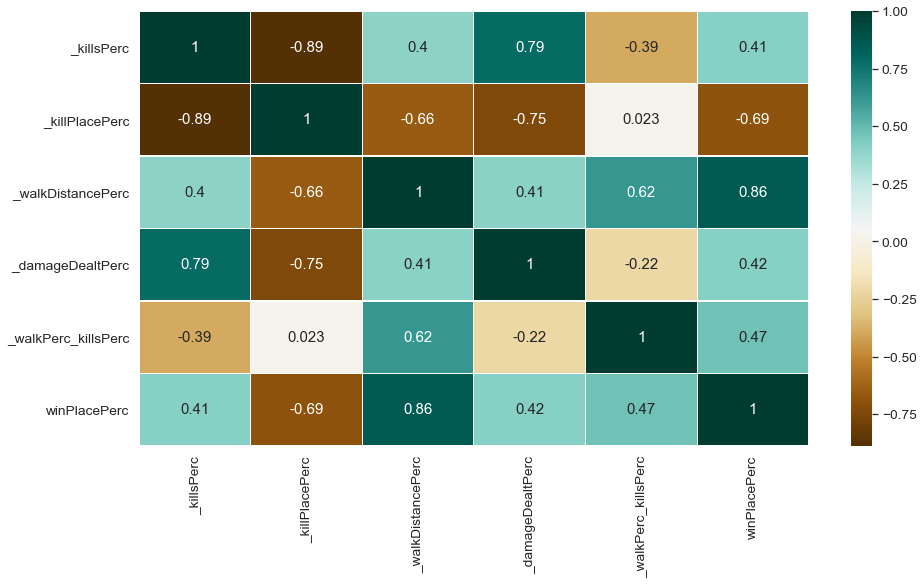

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="BrBG"
)
plt.show()

In [83]:
agg = cleaned_data.groupby(['groupId']).size().to_frame('players_in_team')
cleaned_data = cleaned_data.merge(agg, how='left', on=['groupId'])
cleaned_data['_healthItems'] = cleaned_data['heals'] + cleaned_data['boosts']
cleaned_data['_headshotKillRate'] = cleaned_data['headshotKills'] / cleaned_data['kills']
cleaned_data['_killPlaceOverMaxPlace'] = cleaned_data['killPlace'] / cleaned_data['maxPlace']
cleaned_data['_killsOverWalkDistance'] = cleaned_data['kills'] / cleaned_data['walkDistance']
cleaned_data['_killsOverDistance'] = cleaned_data['kills'] / cleaned_data['_totalDistance']
cleaned_data['_walkDistancePerSec'] = cleaned_data['walkDistance'] / cleaned_data['matchDuration']
cleaned_data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,_walkDistancePerc,_damageDealtPerc,_walkPerc_killsPerc,players_in_team,_healthItems,_headshotKillRate,_killPlaceOverMaxPlace,_killsOverWalkDistance,_killsOverDistance,_walkDistancePerSec
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0.357143,0.214286,1.250000,1,0,NaN,2.709677,0.000000,0.000000,0.107840
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0.566667,0.166667,2.000000,2,0,NaN,1.900000,0.000000,0.000000,0.973110
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0.538462,0.384615,2.333333,1,1,NaN,0.520833,0.000000,0.000000,0.470994
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,0.083333,0.125000,0.266667,2,0,NaN,2.000000,0.000000,0.000000,0.022330
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0.629630,0.388889,1.133333,1,5,0.0,0.313131,0.000581,0.000379,0.784770


In [84]:
corr = cleaned_data[['killPlace', 'walkDistance','players_in_team','_healthItems', '_headshotKillRate', '_killPlaceOverMaxPlace', '_killsOverWalkDistance', '_killsOverDistance','_walkDistancePerSec','winPlacePerc']].corr()

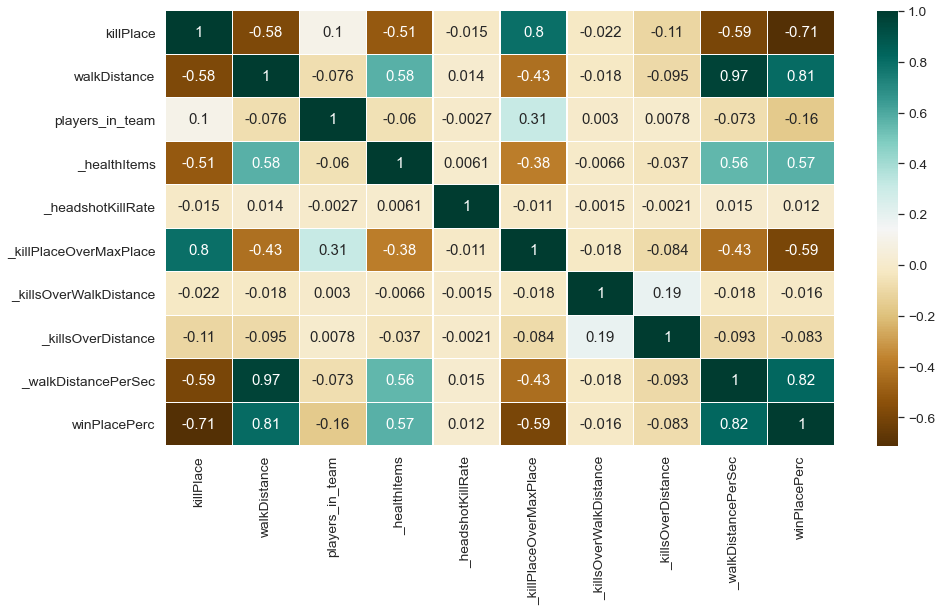

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="BrBG"
)
plt.show()

In [86]:
cleaned_data.shape

(1087286, 50)

In [87]:
cleaned_data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', '_totalDistance', '_headshot_rate',
       '_killsWithoutMoving', '_playersJoined', '_killsNorm',
       '_damageDealtNorm', '_maxPlaceNorm', '_matchDurationNorm', '_killsPerc',
       '_killPlacePerc', '_walkDistancePerc', '_damageDealtPerc',
       '_walkPerc_killsPerc', 'players_in_team', '_healthItems',
       '_headshotKillRate', '_killPlaceOverMaxPlace', '_killsOverWalkDistance',
       '_killsOverDistance', '_walkDistancePerSec'],
      dtype='object')

In [88]:
cleaned_data.drop(['_headshotKillRate','_killsOverDistance', '_killsOverWalkDistance', ], axis=1, inplace=True)

In [89]:
cleaned_data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,_matchDurationNorm,_killsPerc,_killPlacePerc,_walkDistancePerc,_damageDealtPerc,_walkPerc_killsPerc,players_in_team,_healthItems,_killPlaceOverMaxPlace,_walkDistancePerSec
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,2413.16,0.285714,0.857143,0.357143,0.214286,1.250000,1,0,2.709677,0.107840
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,3350.70,0.283333,0.566667,0.566667,0.166667,2.000000,2,0,1.900000,0.973110
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,3029.34,0.230769,0.615385,0.538462,0.384615,2.333333,1,1,0.520833,0.470994
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,3058.88,0.312500,0.625000,0.083333,0.125000,0.266667,2,0,2.000000,0.022330
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,3793.89,0.555556,0.518519,0.629630,0.388889,1.133333,1,5,0.313131,0.784770


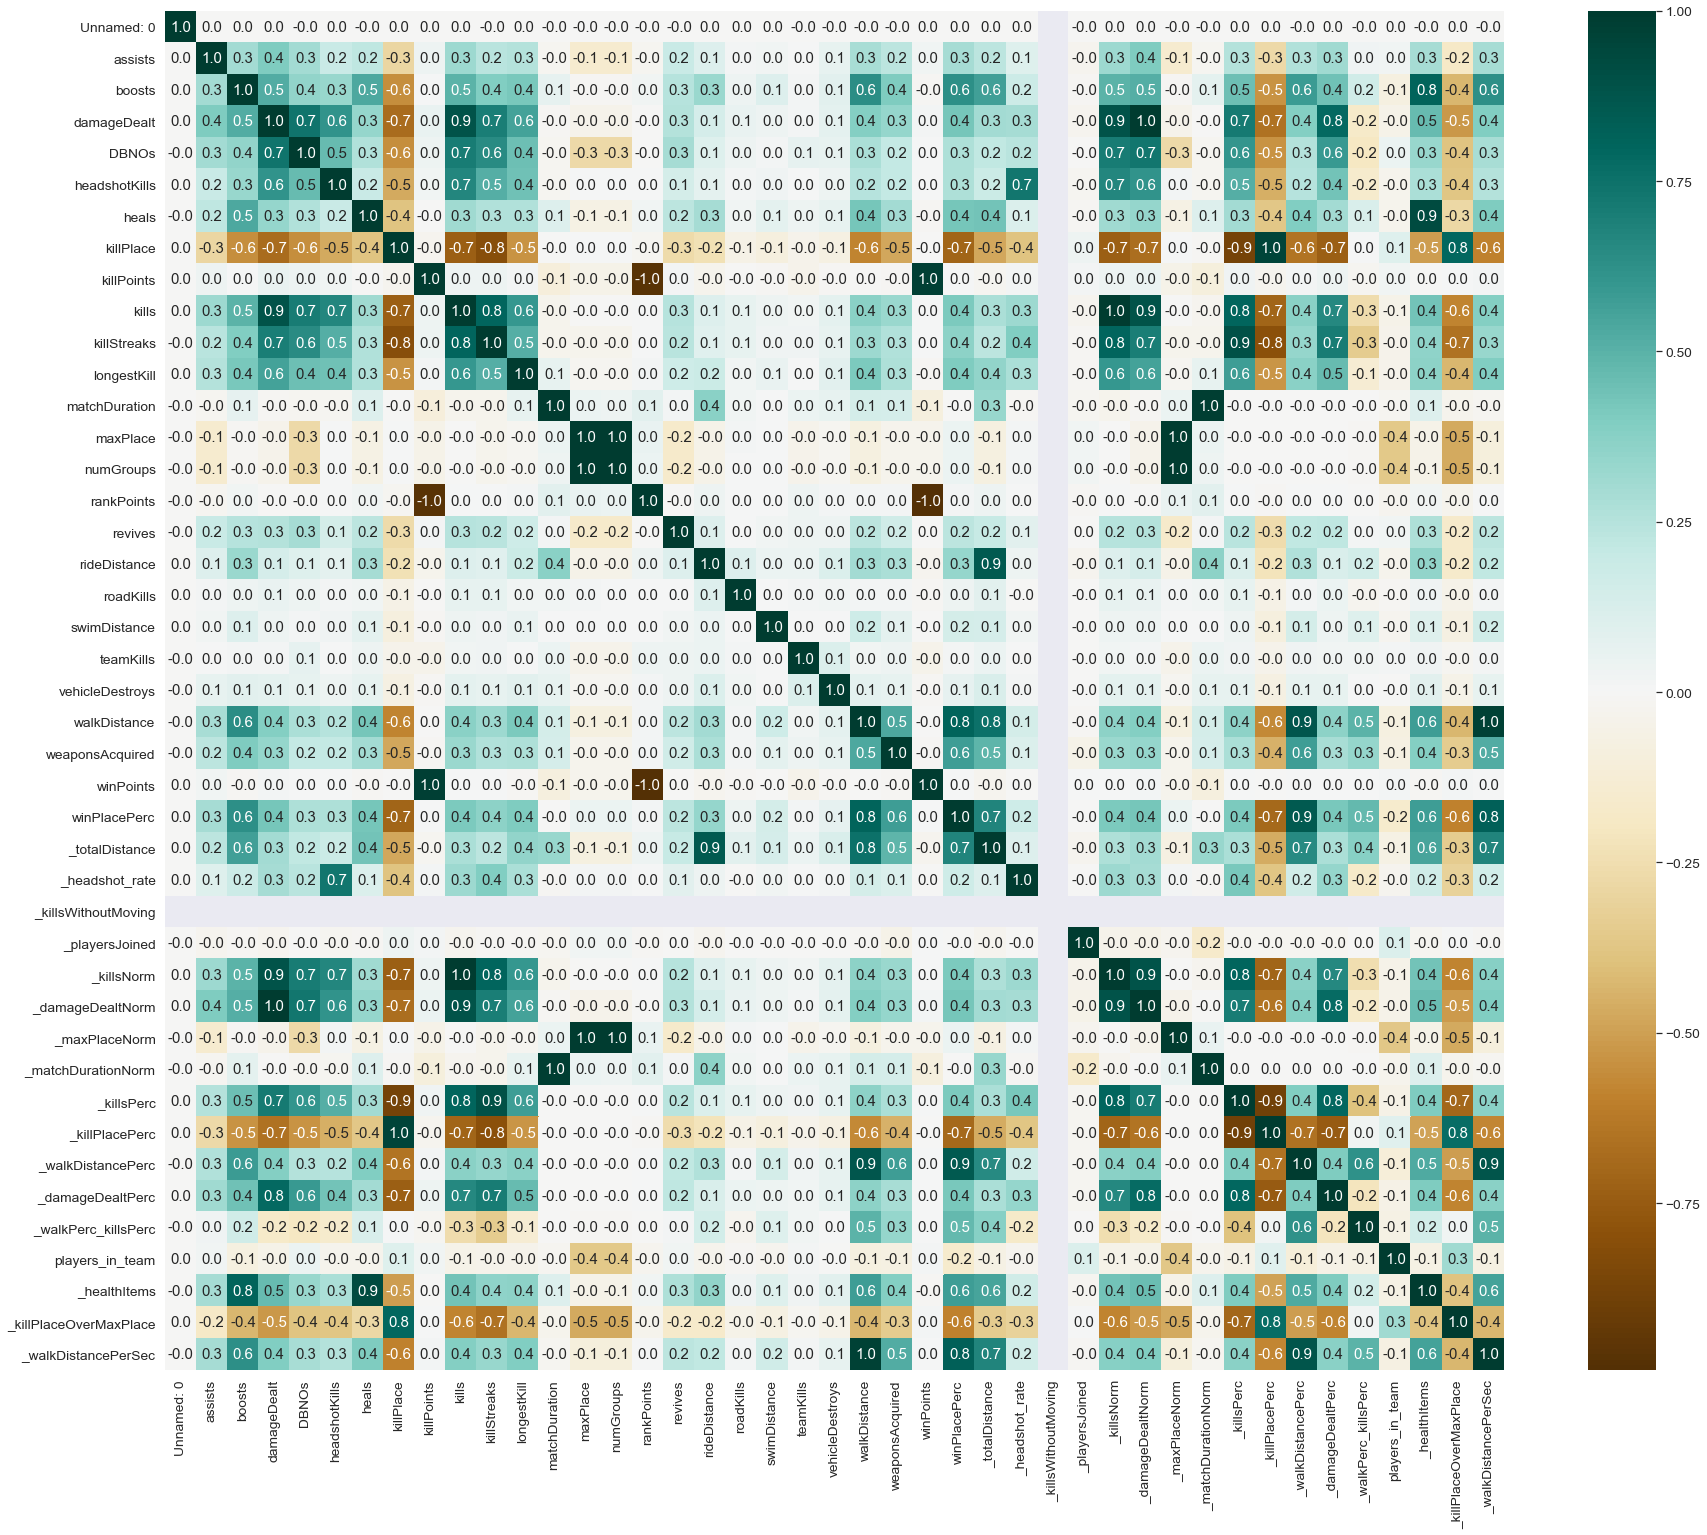

In [90]:
cols_to_fit = [col for col in cleaned_data.columns]
corr = cleaned_data[cols_to_fit].corr()
f,ax = plt.subplots(figsize=(30, 25))
sns.heatmap(cleaned_data[cols_to_fit].corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

### Removing features having 0 correlation with winPlacePerc

In [91]:
cleaned_data.drop(['killPoints','matchDuration','maxPlace','numGroups','rankPoints','roadKills','teamKills','winPoints', '_playersJoined', '_maxPlaceNorm', '_matchDurationNorm', '_killsWithoutMoving'], axis=1, inplace=True)

In [92]:
cleaned_data.shape

(1087286, 35)

### Removing variables with high correlation between them

In [93]:
cleaned_data.drop(['headshotKills','vehicleDestroys'], axis=1, inplace=True)

In [94]:
cleaned_data.drop(['_headshot_rate'], axis=1, inplace=True)

In [95]:
cleaned_data.shape

(1087286, 32)

In [96]:
#Saving highly correlated data
cleaned_data.to_csv('Highly_correlated_data.csv', index=False)

### Part 4: Final Prediction

Let's have a look at our problem statement and our target variable

> **Problem Statement:** *You must create a model which predicts **players' finishing placement** based on their final stats, on a scale from 1 (first place) to 0 (last place)*

> **Target variable:** *winPlacePerc - This is a **percentile winning placement**, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.*

So our goal is to **rank** players and our target variable is a **percentile**. 

These two bits are critical pieces of information: the goal tells us what kind of **Machine Learning technique** we want to use and the target definition tells us about its **distribution**.

In [97]:
highly_corr = pd.read_csv('Highly_correlated_data.csv')

In [98]:
highly_corr.shape

(1087286, 32)

In [99]:
highly_corr.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,heals,killPlace,...,_damageDealtNorm,_killsPerc,_killPlacePerc,_walkDistancePerc,_damageDealtPerc,_walkPerc_killsPerc,players_in_team,_healthItems,_killPlaceOverMaxPlace,_walkDistancePerSec
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,84,...,44.5996,0.285714,0.857143,0.357143,0.214286,1.250000,1,0,2.709677,0.107840
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,57,...,62.4070,0.283333,0.566667,0.566667,0.166667,2.000000,2,0,1.900000,0.973110
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,50,...,83.0502,0.230769,0.615385,0.538462,0.384615,2.333333,1,1,0.520833,0.470994
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,56,...,0.0000,0.312500,0.625000,0.083333,0.125000,0.266667,2,0,2.000000,0.022330
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,3,31,...,173.0000,0.555556,0.518519,0.629630,0.388889,1.133333,1,5,0.313131,0.784770


In [100]:
highly_corr.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'heals', 'killPlace', 'kills', 'killStreaks',
       'longestKill', 'matchType', 'revives', 'rideDistance', 'swimDistance',
       'walkDistance', 'weaponsAcquired', 'winPlacePerc', '_totalDistance',
       '_killsNorm', '_damageDealtNorm', '_killsPerc', '_killPlacePerc',
       '_walkDistancePerc', '_damageDealtPerc', '_walkPerc_killsPerc',
       'players_in_team', '_healthItems', '_killPlaceOverMaxPlace',
       '_walkDistancePerSec'],
      dtype='object')

In [101]:
# One hot encode matchType
highly_corr = pd.get_dummies(highly_corr, columns=['matchType'])

# Take a look at the encoding
matchType_encoding = highly_corr.filter(regex='matchType')
matchType_encoding.head()

,matchType_duo,matchType_solo,matchType_squad
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


There are a lot of groupId's and matchId's so one-hot encoding them is computational suicide. We will turn them into category codes. That way we can still benefit from correlations between groups and matches in our Random Forest algorithm.

In [102]:
# Turn groupId and match Id into categorical types
highly_corr['groupId'] = highly_corr['groupId'].astype('category')
highly_corr['matchId'] = highly_corr['matchId'].astype('category')

# Get category coding for groupId and matchID
highly_corr['groupId_cat'] = highly_corr['groupId'].cat.codes
highly_corr['matchId_cat'] = highly_corr['matchId'].cat.codes

# Get rid of old columns
highly_corr.drop(columns=['groupId', 'matchId'], inplace=True)

# Lets take a look at our newly created features
highly_corr[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,677726,30405
1,276584,33898
2,250965,39886
3,519590,40313
4,801210,43821


In [103]:
# Drop Id column, because it probably won't be useful for our Machine Learning algorithm,
# because the test set contains different Id's
highly_corr.drop(columns = ['Id'], inplace=True)

In [104]:
highly_corr.head()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,heals,killPlace,kills,killStreaks,longestKill,...,_walkPerc_killsPerc,players_in_team,_healthItems,_killPlaceOverMaxPlace,_walkDistancePerSec,matchType_duo,matchType_solo,matchType_squad,groupId_cat,matchId_cat
0,2093518,0,0,25.93,0,0,84,0,0,0.000,...,1.250000,1,0,2.709677,0.107840,0,0,1,677726,30405
1,3701672,0,0,36.71,0,0,57,0,0,0.000,...,2.000000,2,0,1.900000,0.973110,0,0,1,276584,33898
2,2059784,0,1,47.73,0,0,50,0,0,0.000,...,2.333333,1,1,0.520833,0.470994,0,1,0,250965,39886
3,1302036,0,0,0.00,0,0,56,0,0,0.000,...,0.266667,2,0,2.000000,0.022330,0,0,1,519590,40313
4,297180,0,2,100.00,0,3,31,1,1,7.737,...,1.133333,1,5,0.313131,0.784770,0,1,0,801210,43821


### Getting prepared for building a machine learning model

As we have lot of data in our dataset let us take some sample of data from the original dataset for easy computation and better accuracy

We will take a sample of 500000 rows from our training set for easy debugging and exploration.

In [105]:
# Take sample for debugging and exploration
sample = 500000
df_sample = highly_corr.sample(sample)

In [106]:
df_sample.shape

(500000, 33)

In [107]:
df_sample.columns

Index(['Unnamed: 0', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'revives',
       'rideDistance', 'swimDistance', 'walkDistance', 'weaponsAcquired',
       'winPlacePerc', '_totalDistance', '_killsNorm', '_damageDealtNorm',
       '_killsPerc', '_killPlacePerc', '_walkDistancePerc', '_damageDealtPerc',
       '_walkPerc_killsPerc', 'players_in_team', '_healthItems',
       '_killPlaceOverMaxPlace', '_walkDistancePerSec', 'matchType_duo',
       'matchType_solo', 'matchType_squad', 'groupId_cat', 'matchId_cat'],
      dtype='object')

### Split the data into target variable and predictor variable data.

In [108]:
TargetVariable='winPlacePerc'
Predictors=['assists','boosts','damageDealt','killPlace','kills','longestKill','killStreaks','weaponsAcquired','walkDistance','rideDistance','_totalDistance','matchType_solo','matchType_squad','groupId_cat','matchId_cat']

X=df_sample[Predictors].values
y=df_sample[TargetVariable].values

#### Before Predicting the model we need to Split the data into Training and Testing sample¶
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 80% of data is used as Training data and the rest 20% is used as Tesing data.

In [109]:
# Split the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#### Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [110]:
### Standardization of data ###

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [111]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400000, 15)
(400000,)
(100000, 15)
(100000,)


#### Checking the performance of model by using multiple linear regression algorithm

In [112]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))


###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['winPlacePerc']-TestingDataResults['PredictedwinPlacePerc']))/TestingDataResults['winPlacePerc'])


LinearRegression()
R2 Value: 0.8091333362625344

##### Model Validation and Accuracy Calculations ##########
   winPlacePerc  PredictedwinPlacePerc
0        1.0000                    1.0
1        0.1935                    0.0
2        0.3061                    0.0
3        0.7407                    1.0
4        0.4231                    0.0


#### Checking the Model performance using the Decision tree Algorithm

DecisionTreeRegressor(max_depth=6)
R2 Value: 0.8527427528724592

##### Model Validation and Accuracy Calculations ##########
   winPlacePerc  PredictedwinPlacePerc
0        1.0000                    1.0
1        0.1935                    0.0
2        0.3061                    0.0
3        0.7407                    1.0
4        0.4231                    0.0


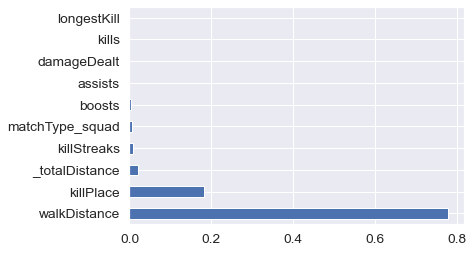

In [113]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['winPlacePerc']-TestingDataResults['PredictedwinPlacePerc']))/TestingDataResults['winPlacePerc'])

*By Preforming the Decision Tree regresor algorithm we can accurately(85%) say that The features like kill place and walk distance have greater impact for the win percentage in PUBG game.*

#### Checking the model performance using the Random forest Algorithm

RandomForestRegressor(max_depth=2, n_estimators=400)
R2 Value: 0.743828903116404

##### Model Validation and Accuracy Calculations ##########
   winPlacePerc  PredictedwinPlacePerc
0        1.0000                    1.0
1        0.1935                    0.0
2        0.3061                    0.0
3        0.7407                    1.0
4        0.4231                    0.0


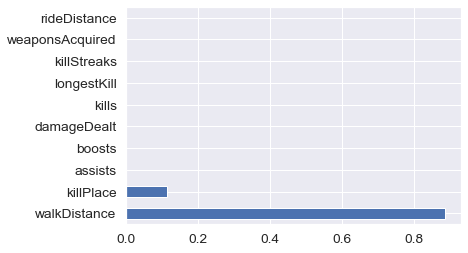

In [114]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['winPlacePerc']-TestingDataResults['PredictedwinPlacePerc']))/TestingDataResults['winPlacePerc'])


*Same as the Decision tree algorithm for the random forest algorithm also accurately predicts that features like kill place and walk distance has greater impact in win place percentage*

#### Checking the model performance by using Adaboost algorithm 

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.821870774148755

##### Model Validation and Accuracy Calculations ##########
   winPlacePerc  PredictedwinPlacePerc
0        1.0000                    1.0
1        0.1935                    0.0
2        0.3061                    0.0
3        0.7407                    1.0
4        0.4231                    0.0


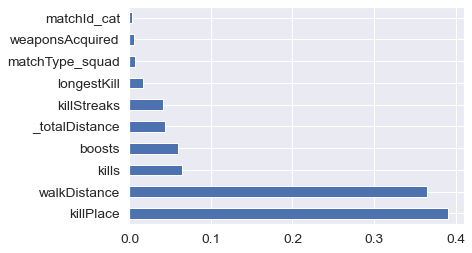

In [115]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['winPlacePerc']-TestingDataResults['PredictedwinPlacePerc']))/TestingDataResults['winPlacePerc'])


From the above two algorithm it only shows two features that is walk distance and kill place impact more chance of increasing win percentage but by perfoming advanced algorithm named Adaboost Algorithm we can say that features like **killStreaks,totalDistance,boosts,kills,walkDistance,KillPlace** impact the win Percentage  

**After performing the some ML algorithms we come to know that Adaboost algorithm and decision tree providing better result in predicting the WinPlacePercentage** 

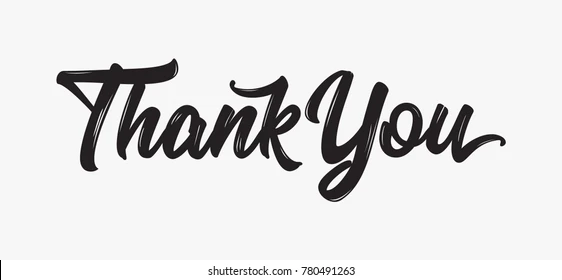